In [247]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import beta
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
%matplotlib inline

In [53]:
data = pd.read_csv('7B21E008.csv')
df=pd.DataFrame(data)

In [54]:
df['casual'] = df.apply(lambda row: row.rental - row.member, axis=1)

In [55]:
conditions = [
    (df['season'] == 'spring'),
    (df['season'] == 'summer'),
    (df['season'] == 'fall'),
    (df['season'] == 'winter')
    ]
values = [1,2,3,4]
df['season_value'] = np.select(conditions, values)

In [56]:
conditions = [
    (df['weather'] ==1),
    (df['weather'] ==2),
    (df['weather'] ==3),
    (df['weather']==4)
    ]
values = ['fair','cloudy','Light_S_R','Heavy_S_R']
df['weather_name'] = np.select(conditions, values)

In [57]:
df['dateInt']=df['year'].astype(str) + df['month'].astype(str).str.zfill(2)+ df['day'].astype(str).str.zfill(2)
df['Date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d')
df['Date']

0       2016-10-01
1       2016-10-01
2       2016-10-01
3       2016-10-01
4       2016-10-01
           ...    
17461   2018-09-30
17462   2018-09-30
17463   2018-09-30
17464   2018-09-30
17465   2018-09-30
Name: Date, Length: 17466, dtype: datetime64[ns]

In [58]:
print(df)

       year  month  day  hour  member  weekend season  temperature  dewpoint  \
0      2016     10    1     0      80        1   fall        18.33      65.0   
1      2016     10    1     1      53        1   fall        17.78      64.0   
2      2016     10    1     2      27        1   fall        17.78      64.0   
3      2016     10    1     3      20        1   fall        17.78      64.0   
4      2016     10    1     4      11        1   fall        17.78      64.0   
...     ...    ...  ...   ...     ...      ...    ...          ...       ...   
17461  2018      9   30    19     416        1   fall        21.67      60.0   
17462  2018      9   30    20     278        1   fall        21.67      61.0   
17463  2018      9   30    21     233        1   fall        21.11      62.0   
17464  2018      9   30    22     148        1   fall        20.00      63.0   
17465  2018      9   30    23      83        1   fall        20.00      62.0   

       humidity  ...  pressure  precip 

In [59]:
data.head()

year  month  day  hour  member  weekend season  temperature  dewpoint  \
0  2016     10    1     0      80        1   fall        18.33      65.0   
1  2016     10    1     1      53        1   fall        17.78      64.0   
2  2016     10    1     2      27        1   fall        17.78      64.0   
3  2016     10    1     3      20        1   fall        17.78      64.0   
4  2016     10    1     4      11        1   fall        17.78      64.0   

   humidity  ...  pressure  precip  precipaccum  weather  rental  casual  \
0     100.0  ...      30.1     0.0          0.0        3     103      23   
1     100.0  ...      30.1     0.0          0.0        3      63      10   
2     100.0  ...      30.1     0.0          0.0        3      33       6   
3     100.0  ...      30.1     0.1          0.0        3      23       3   
4     100.0  ...      30.1     0.0          0.0        3      11       0   

   season_value  weather_name   dateInt       Date  
0             3     Light_S_R  20161001 2016-10-01  
1             3     Light_S_R  20161001 2016-10-01  
2             3     Light_S_R  20161001 2016-10-01  
3             3     Light_S_R  20161001 2016-10-01  
4             3     Light_S_R  20161001 2016-10-01  

[5 rows x 22 columns]

In [60]:
print("Number of rows: {}\nNumber of columns: {}".format(*data.shape))

Number of rows: 17466
Number of columns: 22


In [61]:
duplicates = data[data.duplicated()]
duplicates

Empty DataFrame
Columns: [year, month, day, hour, member, weekend, season, temperature, dewpoint, humidity, windspeed, windgust, pressure, precip, precipaccum, weather, rental, casual, season_value, weather_name, dateInt, Date]
Index: []

[0 rows x 22 columns]

In [62]:
sample = df.sample(frac=0.15, replace=True, random_state=1)

<AxesSubplot:>

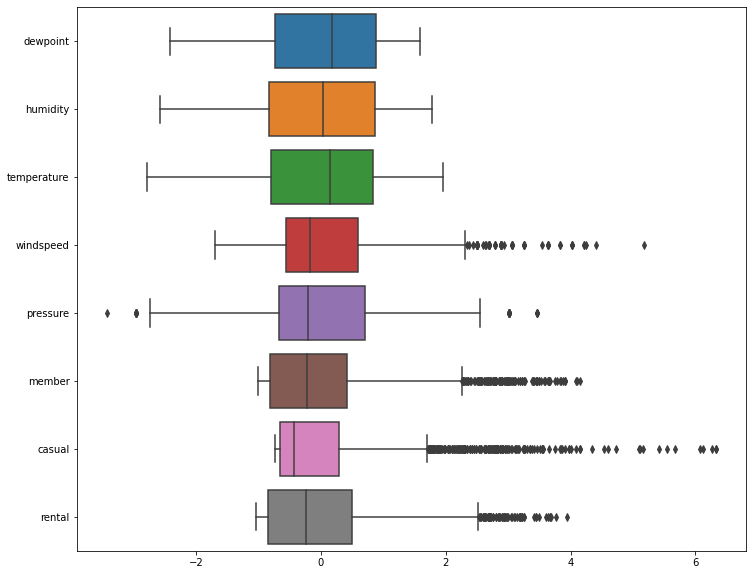

In [63]:
plt.figure(figsize=(12, 10))
numeric = sample[
    ["dewpoint", "humidity", "temperature", "windspeed","pressure","member","casual","rental"]
]
numeric = (numeric - numeric.mean()) / numeric.std()
sn.boxplot(data=numeric, orient="h")

In [64]:
for x in ['windspeed']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [65]:
for x in ['pressure']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [66]:
for x in ['member']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [67]:
for x in ['casual']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [68]:
for x in ['rental']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [69]:
data.isnull().sum()

year               0
month              0
day                0
hour               0
member           798
weekend            0
season             0
temperature        0
dewpoint           0
humidity           0
windspeed        353
windgust           0
pressure         202
precip             0
precipaccum        0
weather            0
rental           357
casual          1096
season_value       0
weather_name       0
dateInt            0
Date               0
dtype: int64

In [70]:
data = data.dropna(axis = 0)

In [71]:
data.isnull().sum()

year            0
month           0
day             0
hour            0
member          0
weekend         0
season          0
temperature     0
dewpoint        0
humidity        0
windspeed       0
windgust        0
pressure        0
precip          0
precipaccum     0
weather         0
rental          0
casual          0
season_value    0
weather_name    0
dateInt         0
Date            0
dtype: int64

<AxesSubplot:>

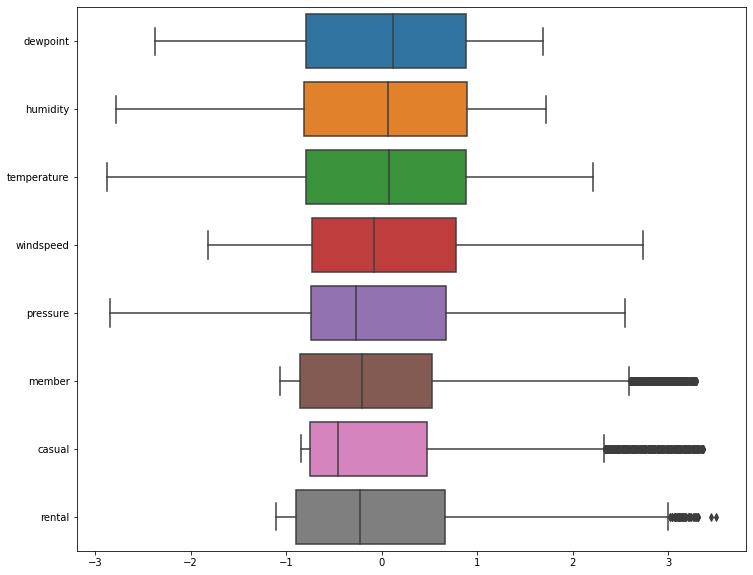

In [72]:
plt.figure(figsize=(12, 10))
numeric = data[
    ["dewpoint", "humidity", "temperature", "windspeed","pressure","member","casual","rental"]
]
numeric = (numeric - numeric.mean()) / numeric.std()
sn.boxplot(data=numeric, orient="h")

In [73]:
df=pd.DataFrame(data)
corrMatrix=df.corr()
print(corrMatrix)

                  year     month       day      hour    member   weekend  \
year          1.000000 -0.504676 -0.005199 -0.002339  0.039270 -0.000860   
month        -0.504676  1.000000  0.008689 -0.003417  0.037929  0.003753   
day          -0.005199  0.008689  1.000000  0.002111 -0.005751 -0.013586   
hour         -0.002339 -0.003417  0.002111  1.000000  0.355959 -0.027668   
member        0.039270  0.037929 -0.005751  0.355959  1.000000 -0.222766   
weekend      -0.000860  0.003753 -0.013586 -0.027668 -0.222766  1.000000   
temperature   0.164969  0.192728  0.035236  0.101515  0.272044 -0.106744   
dewpoint      0.144903  0.210234  0.048364 -0.026083  0.121891 -0.057151   
humidity      0.011086  0.103551  0.044632 -0.252311 -0.233652  0.071992   
windspeed     0.028010 -0.129997 -0.023271  0.140859  0.100416 -0.011233   
windgust     -0.033723 -0.080407 -0.038272  0.073579  0.047871 -0.019737   
pressure     -0.050817  0.060031 -0.068558 -0.017586 -0.056733  0.073372   
precip      

<AxesSubplot:>

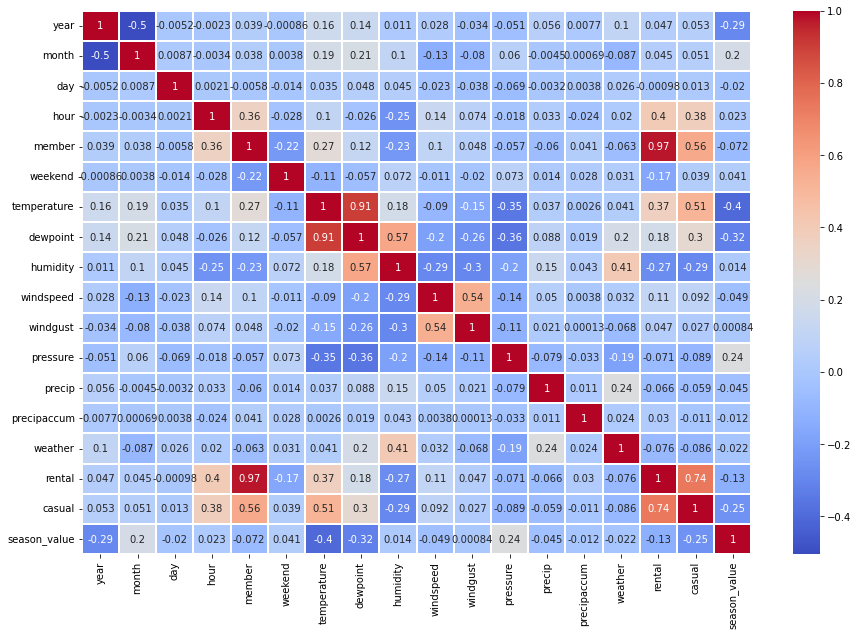

In [76]:
plt.figure(figsize = (15,10))
sn.heatmap(data.corr(), annot = True, cmap = 'coolwarm', linecolor = 'white', linewidths=0.2)

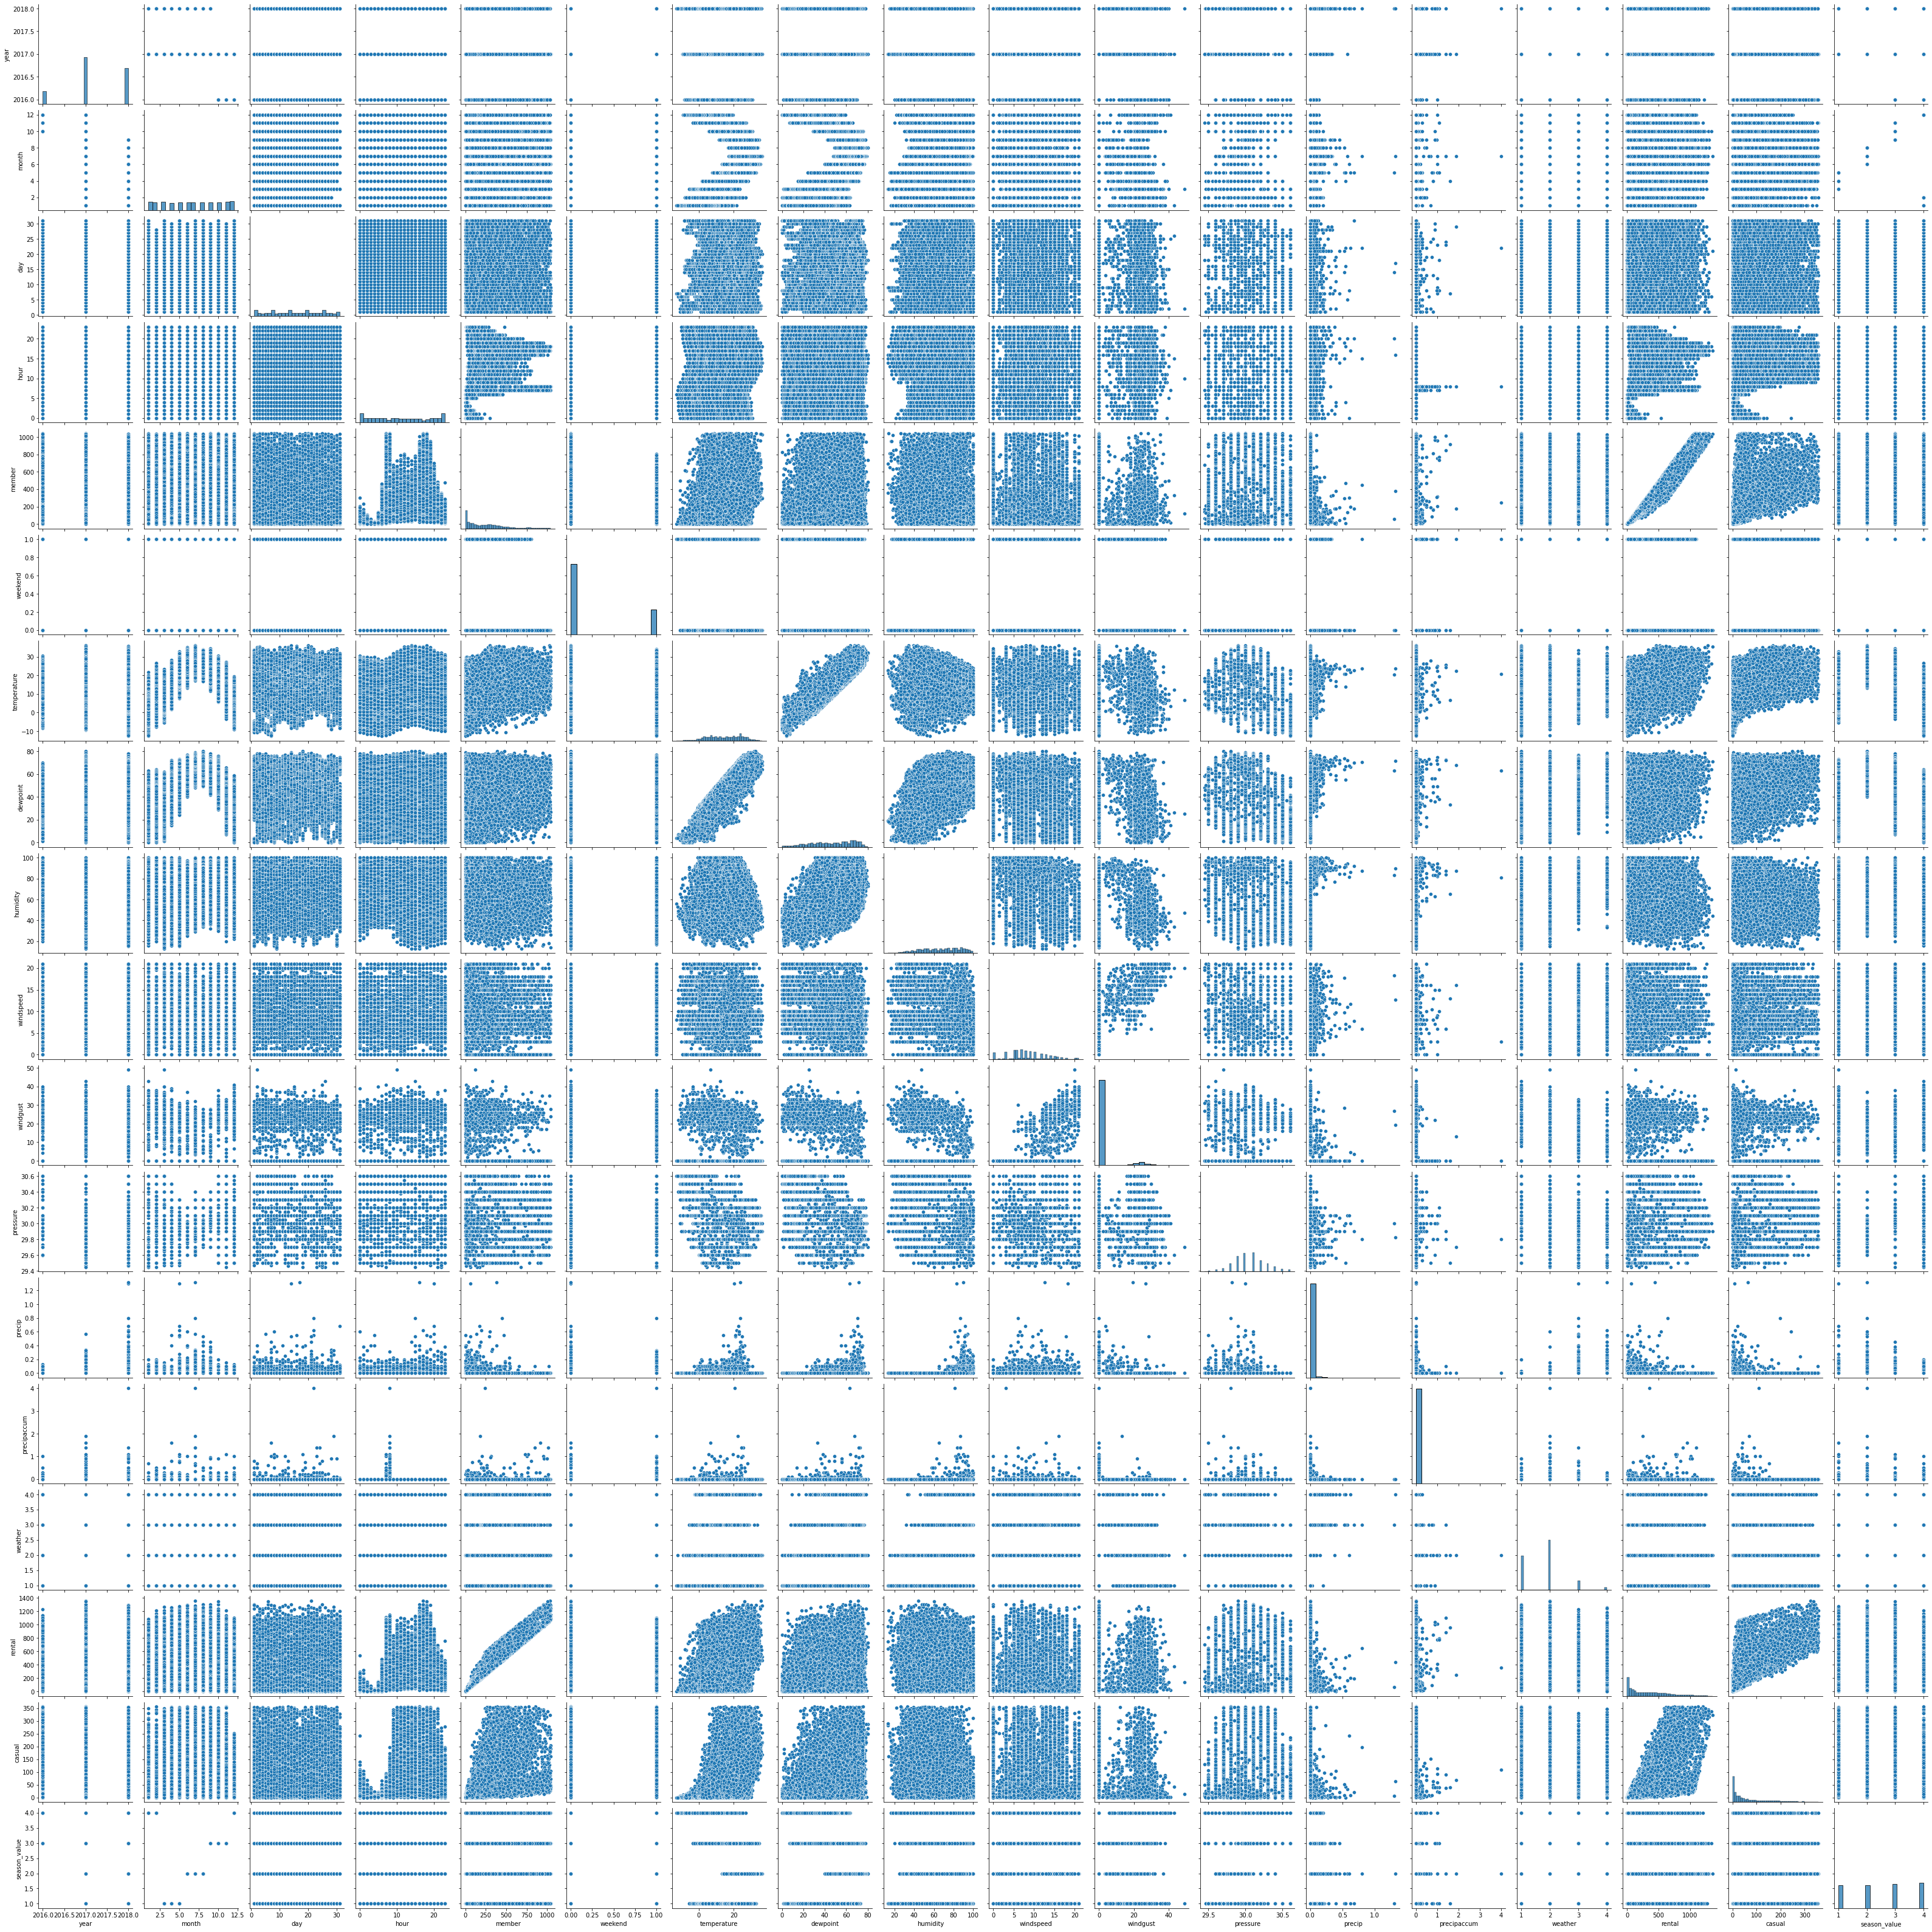

In [77]:
%matplotlib inline
sn.pairplot(data)

In [78]:
data.corr()['rental']

year            0.046905
month           0.045350
day            -0.000978
hour            0.396166
member          0.971458
weekend        -0.169395
temperature     0.368048
dewpoint        0.184699
humidity       -0.272361
windspeed       0.107745
windgust        0.046570
pressure       -0.071365
precip         -0.065795
precipaccum     0.029601
weather        -0.075935
rental          1.000000
casual          0.740443
season_value   -0.129468
Name: rental, dtype: float64

In [79]:
target_corr=abs(corrMatrix['rental'])
positive_corr_target=target_corr[target_corr>(0.3)]
positive_corr_target

hour           0.396166
member         0.971458
temperature    0.368048
rental         1.000000
casual         0.740443
Name: rental, dtype: float64

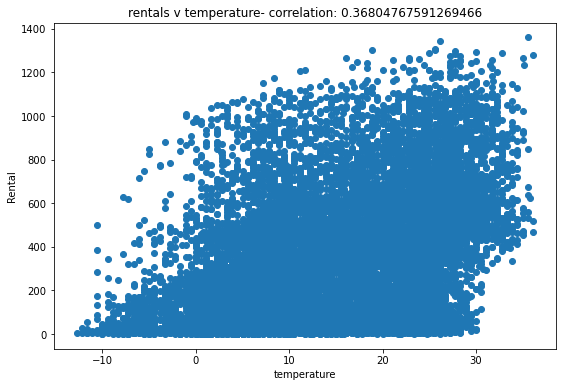

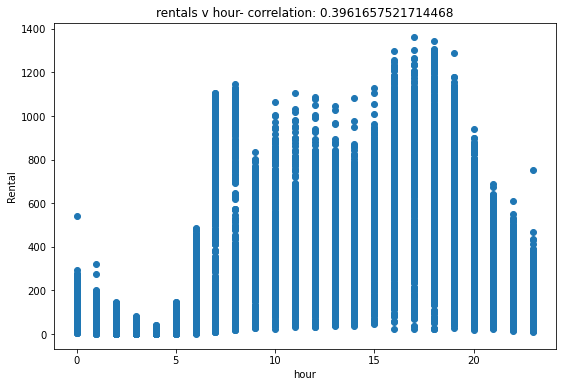

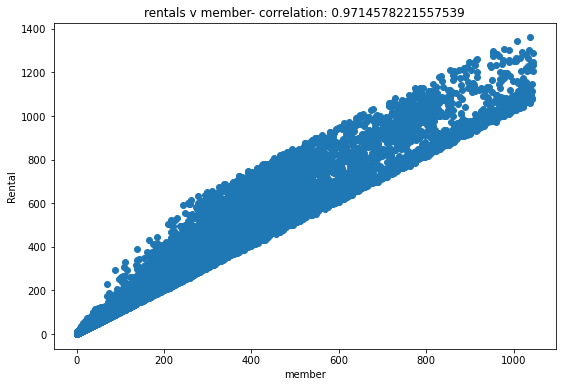

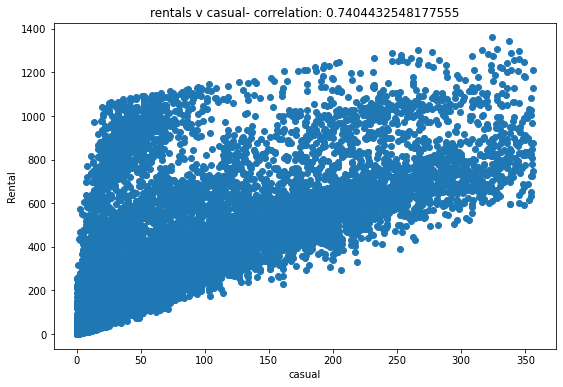

In [83]:
highly_correlated = ['temperature', 'hour', 'member', 'casual']
for col in highly_correlated:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['rental']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rental')
    ax.set_title('rentals v ' + col + '- correlation: ' + str(correlation))
plt.show()

C:\Users\SINA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


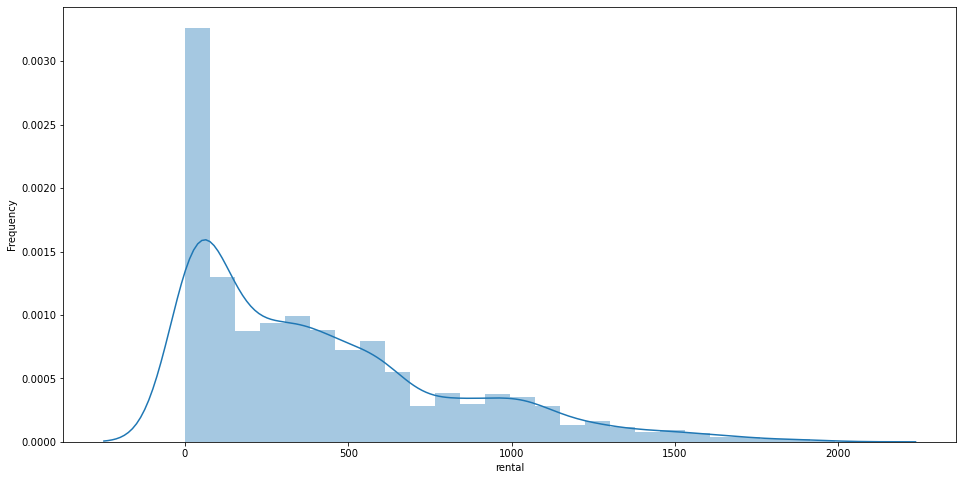

In [81]:
plt.figure(figsize=(16, 8))
sn.distplot(sample["rental"])
plt.ylabel("Frequency")
plt.show()

C:\Users\SINA\AppData\Local\Temp\ipykernel_20648\655292468.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


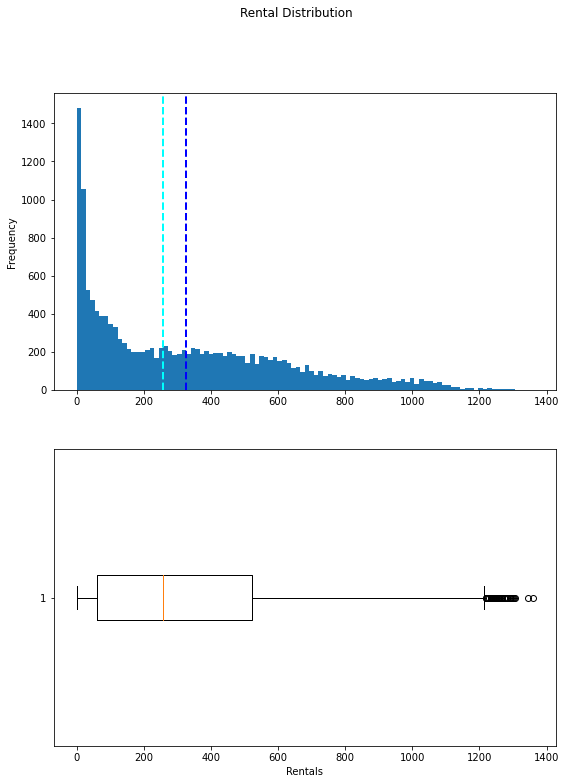

In [95]:
label = data['rental']
fig, ax = plt.subplots(2, 1, figsize = (9,12))   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(label.mean(), color='blue', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')
fig.suptitle('Rental Distribution')
fig.show()

<AxesSubplot:ylabel='Frequency'>

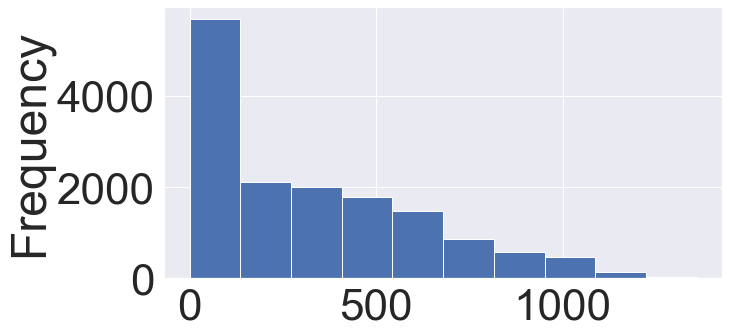

In [145]:
plt.figure(figsize=(10,5))
df['rental'].plot(kind="hist")

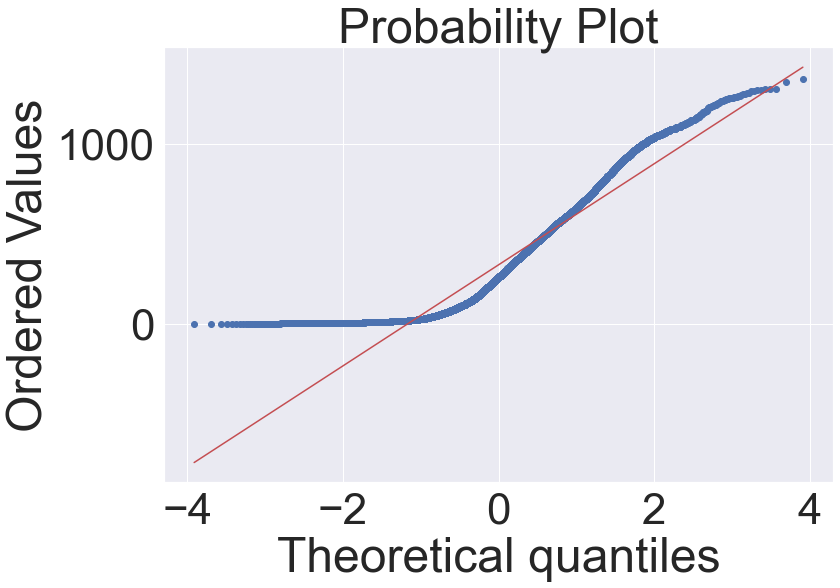

In [128]:
fig=plt.figure(figsize=(12,8))
stats.probplot(data.rental.tolist(),dist='norm',plot=plt)
plt.show()

In [122]:
numeric_features = ['temperature', 'dewpoint', 'humidity', 'windspeed','windgust','pressure','precip','precipaccum']
data[numeric_features + ['rental']].describe()

temperature      dewpoint      humidity     windspeed      windgust  \
count  15099.000000  15099.000000  15099.000000  15099.000000  15099.000000   
mean      14.855983     46.696610     66.723253      8.387845      2.422921   
std        9.612414     19.696502     19.310556      4.618291      7.374075   
min      -12.780000      0.000000     13.000000      0.000000      0.000000   
25%        7.220000     31.000000     51.000000      5.000000      0.000000   
50%       15.560000     49.000000     68.000000      8.000000      0.000000   
75%       23.330000     64.000000     84.000000     12.000000      0.000000   
max       36.110000     80.000000    100.000000     21.000000     49.000000   

           pressure        precip   precipaccum        rental  
count  15099.000000  15099.000000  15099.000000  15099.000000  
mean      30.057515      0.003584      0.002671    326.204716  
std        0.213370      0.030020      0.053439    295.527725  
min       29.450000      0.000000      0.000000      0.000000  
25%       29.900000      0.000000      0.000000     62.000000  
50%       30.000000      0.000000      0.000000    258.000000  
75%       30.200000      0.000000      0.000000    523.000000  
max       30.600000      1.320000      4.000000   1360.000000

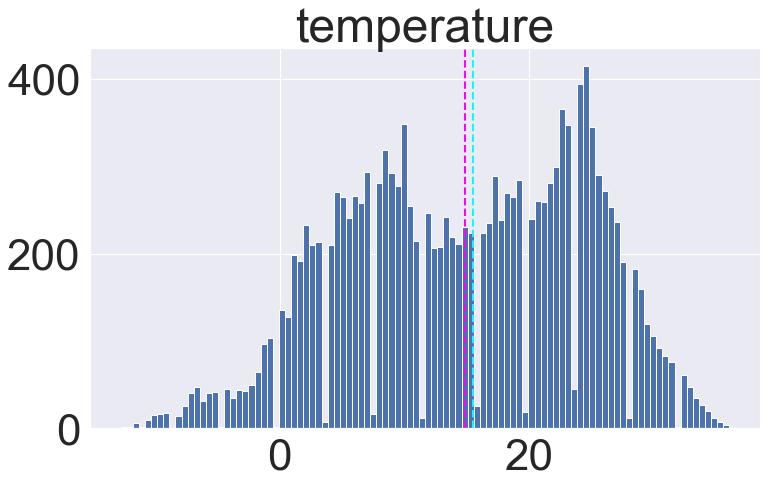

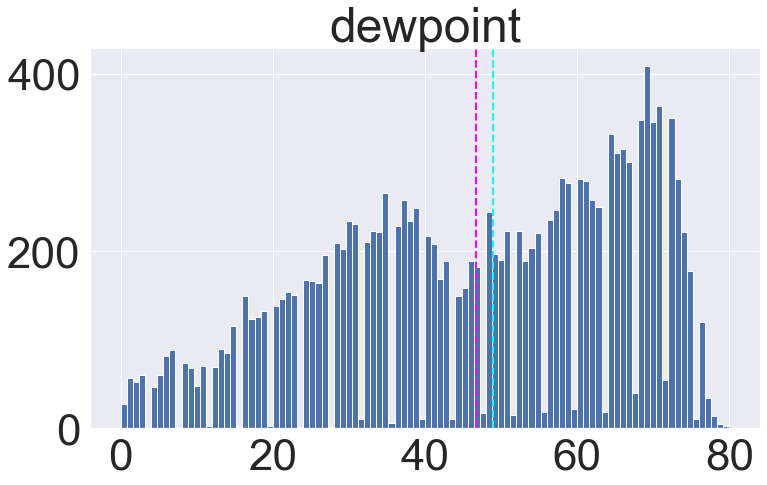

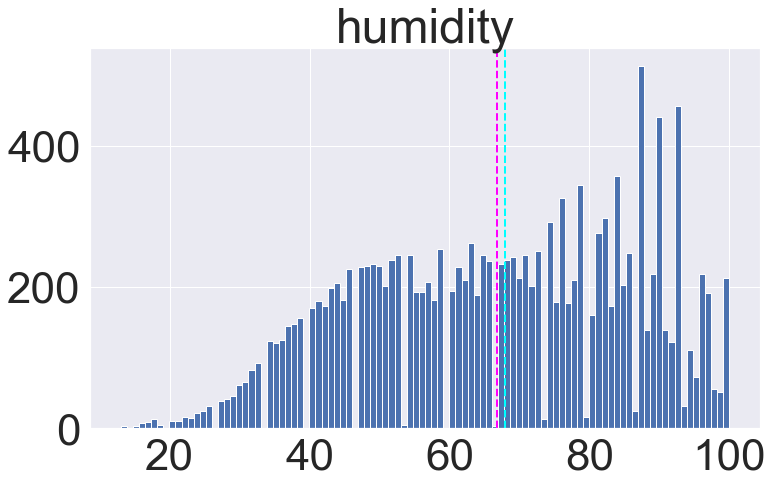

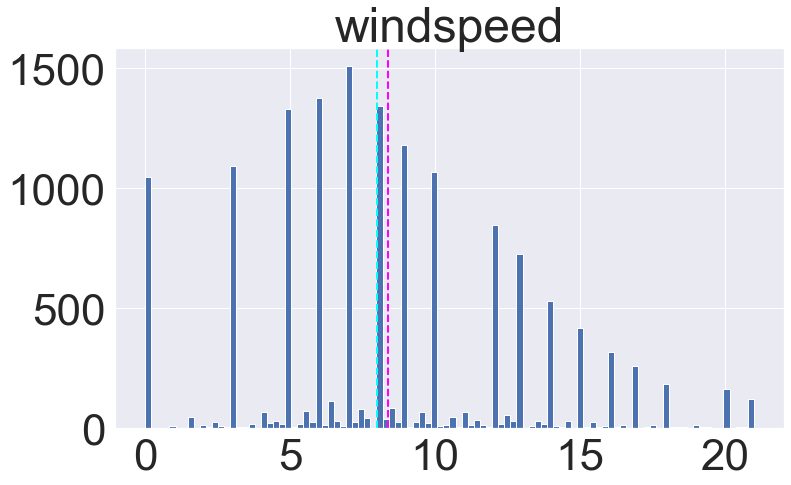

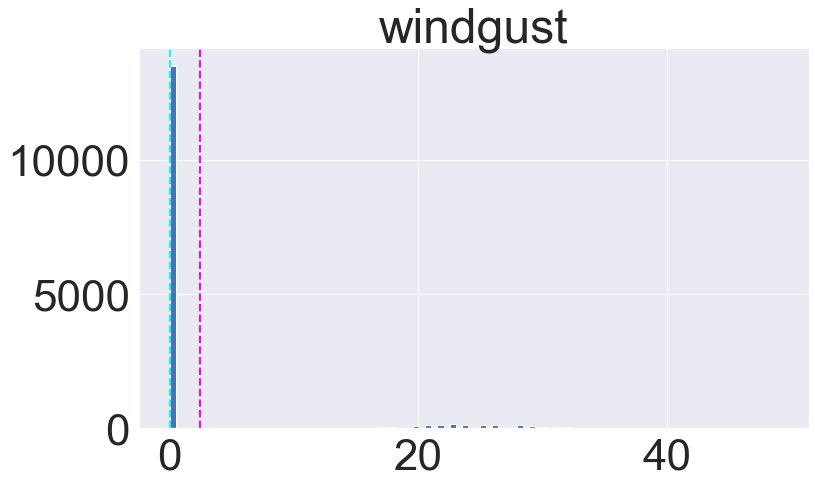

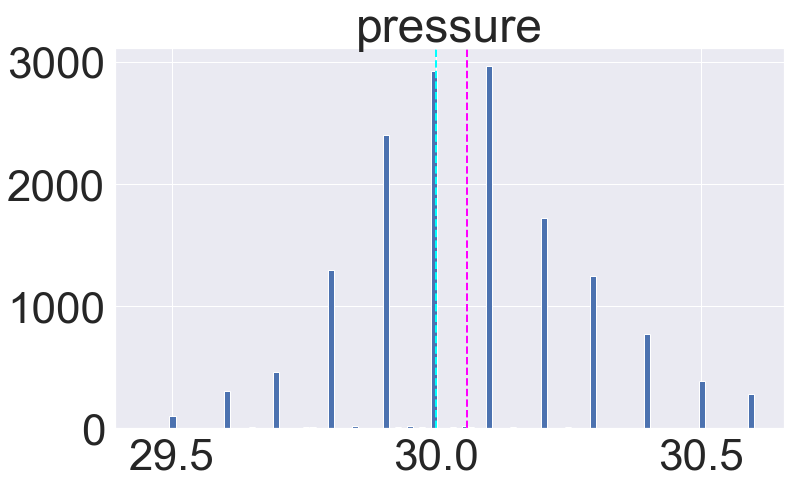

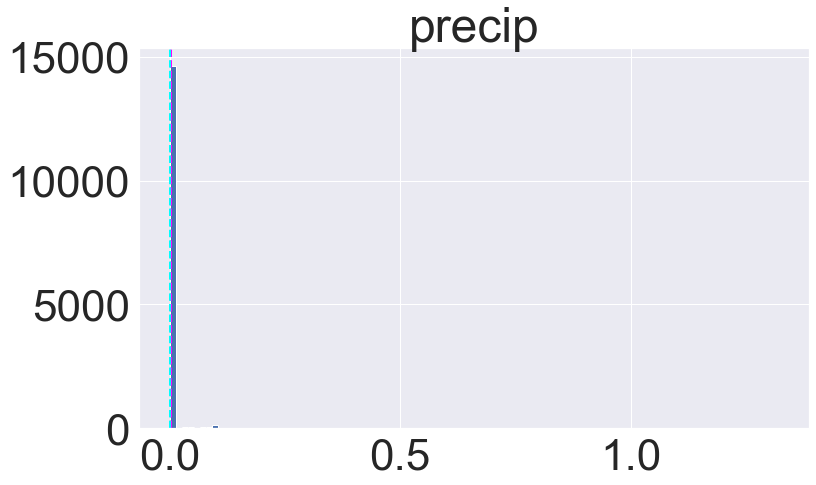

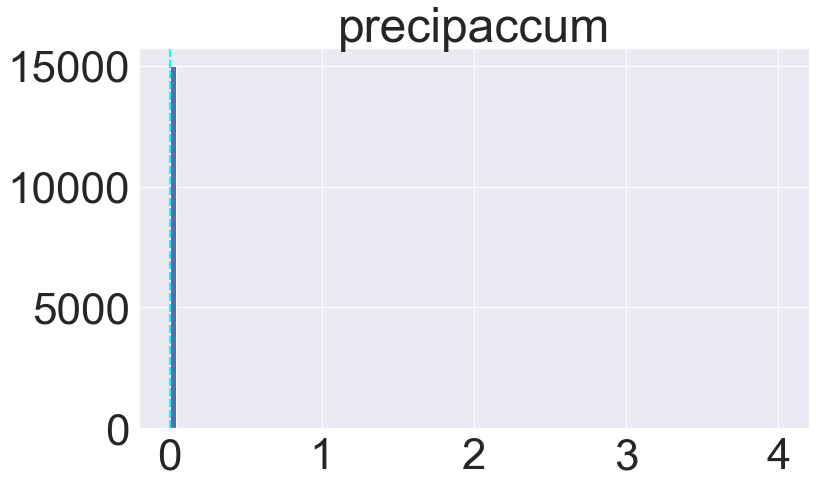

In [124]:
for col in numeric_features:
    fig = plt.figure(figsize=(12, 7))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

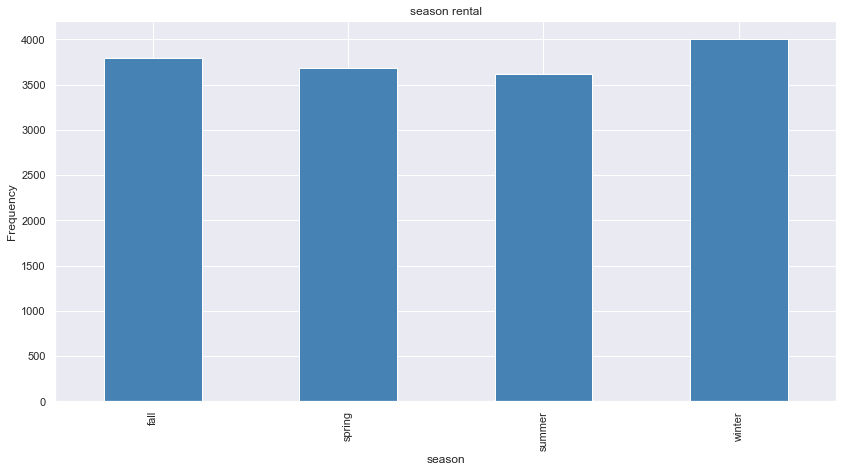

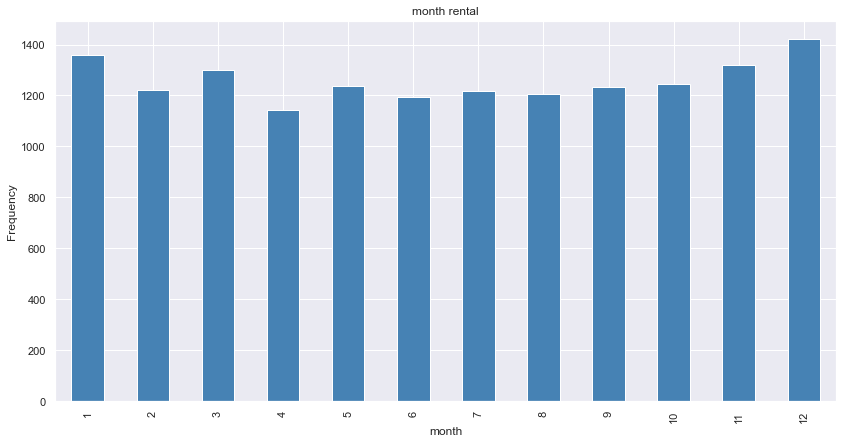

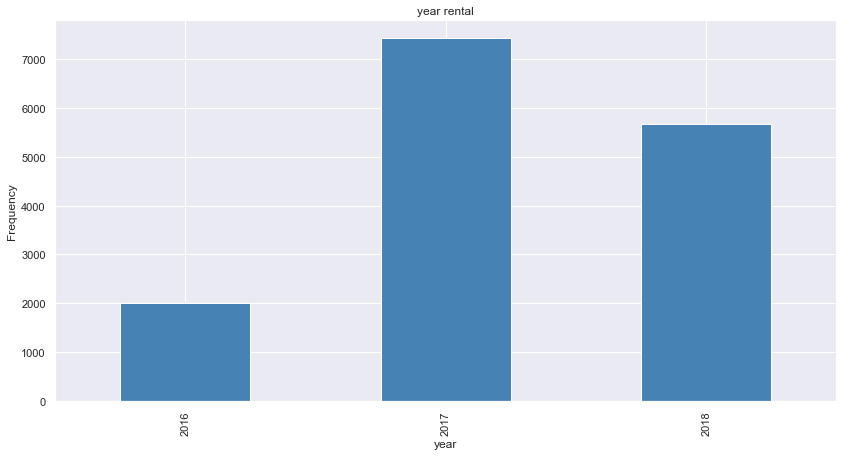

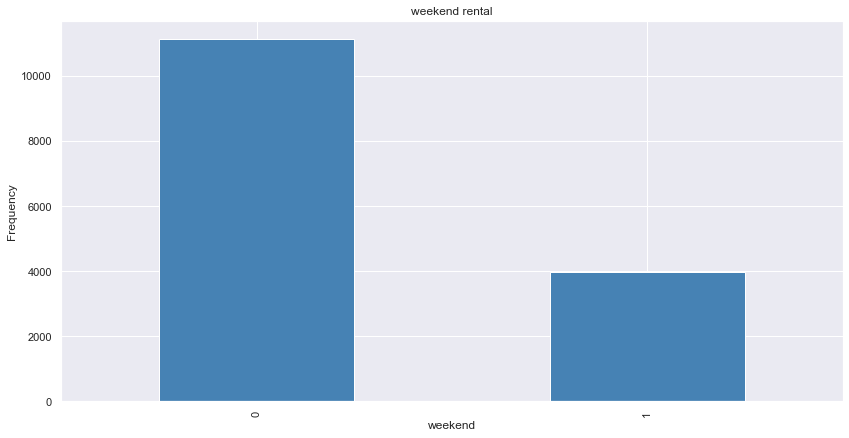

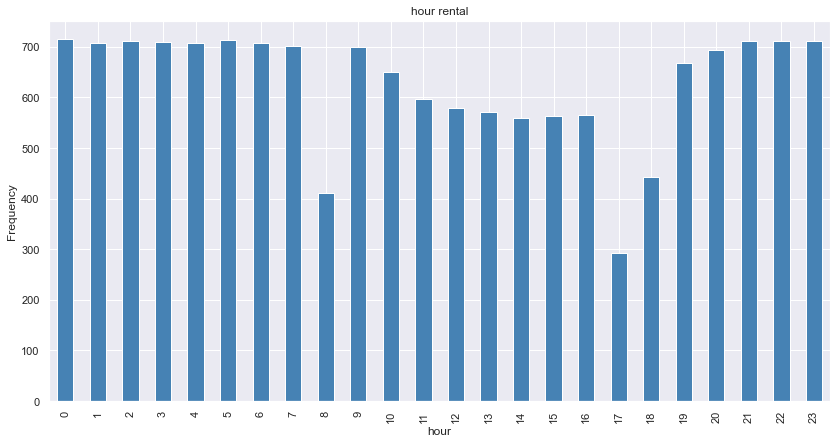

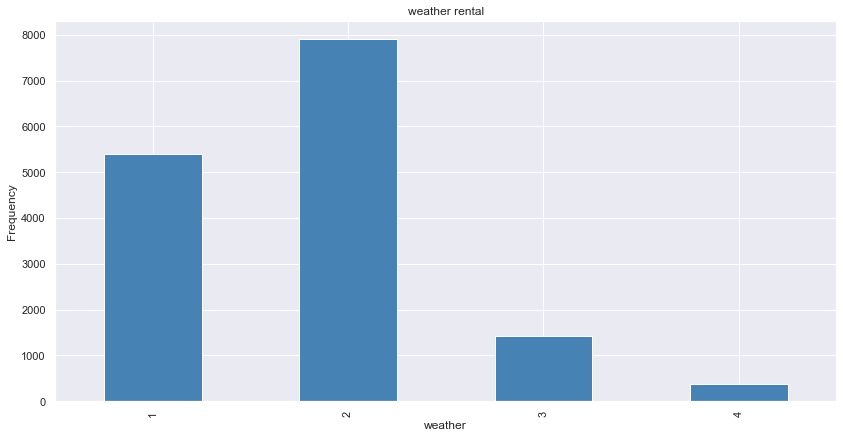

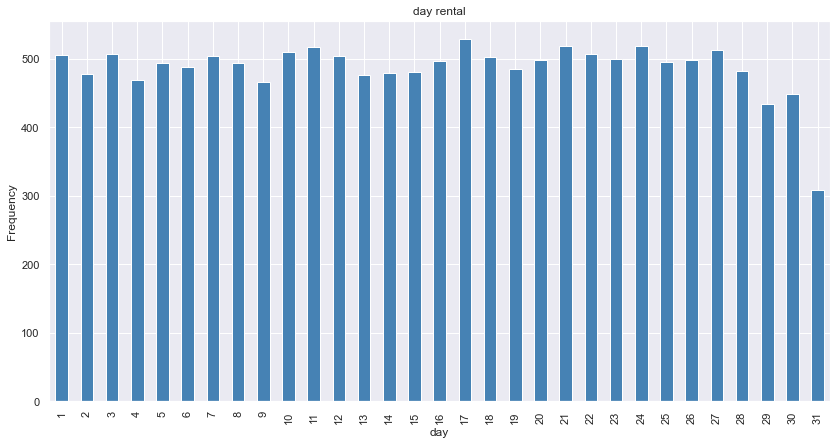

In [199]:
categorical_features = ['season','month','year','weekend','hour','weather', 'day']

for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(14, 7))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' rental')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()
sn.set(font_scale=1)

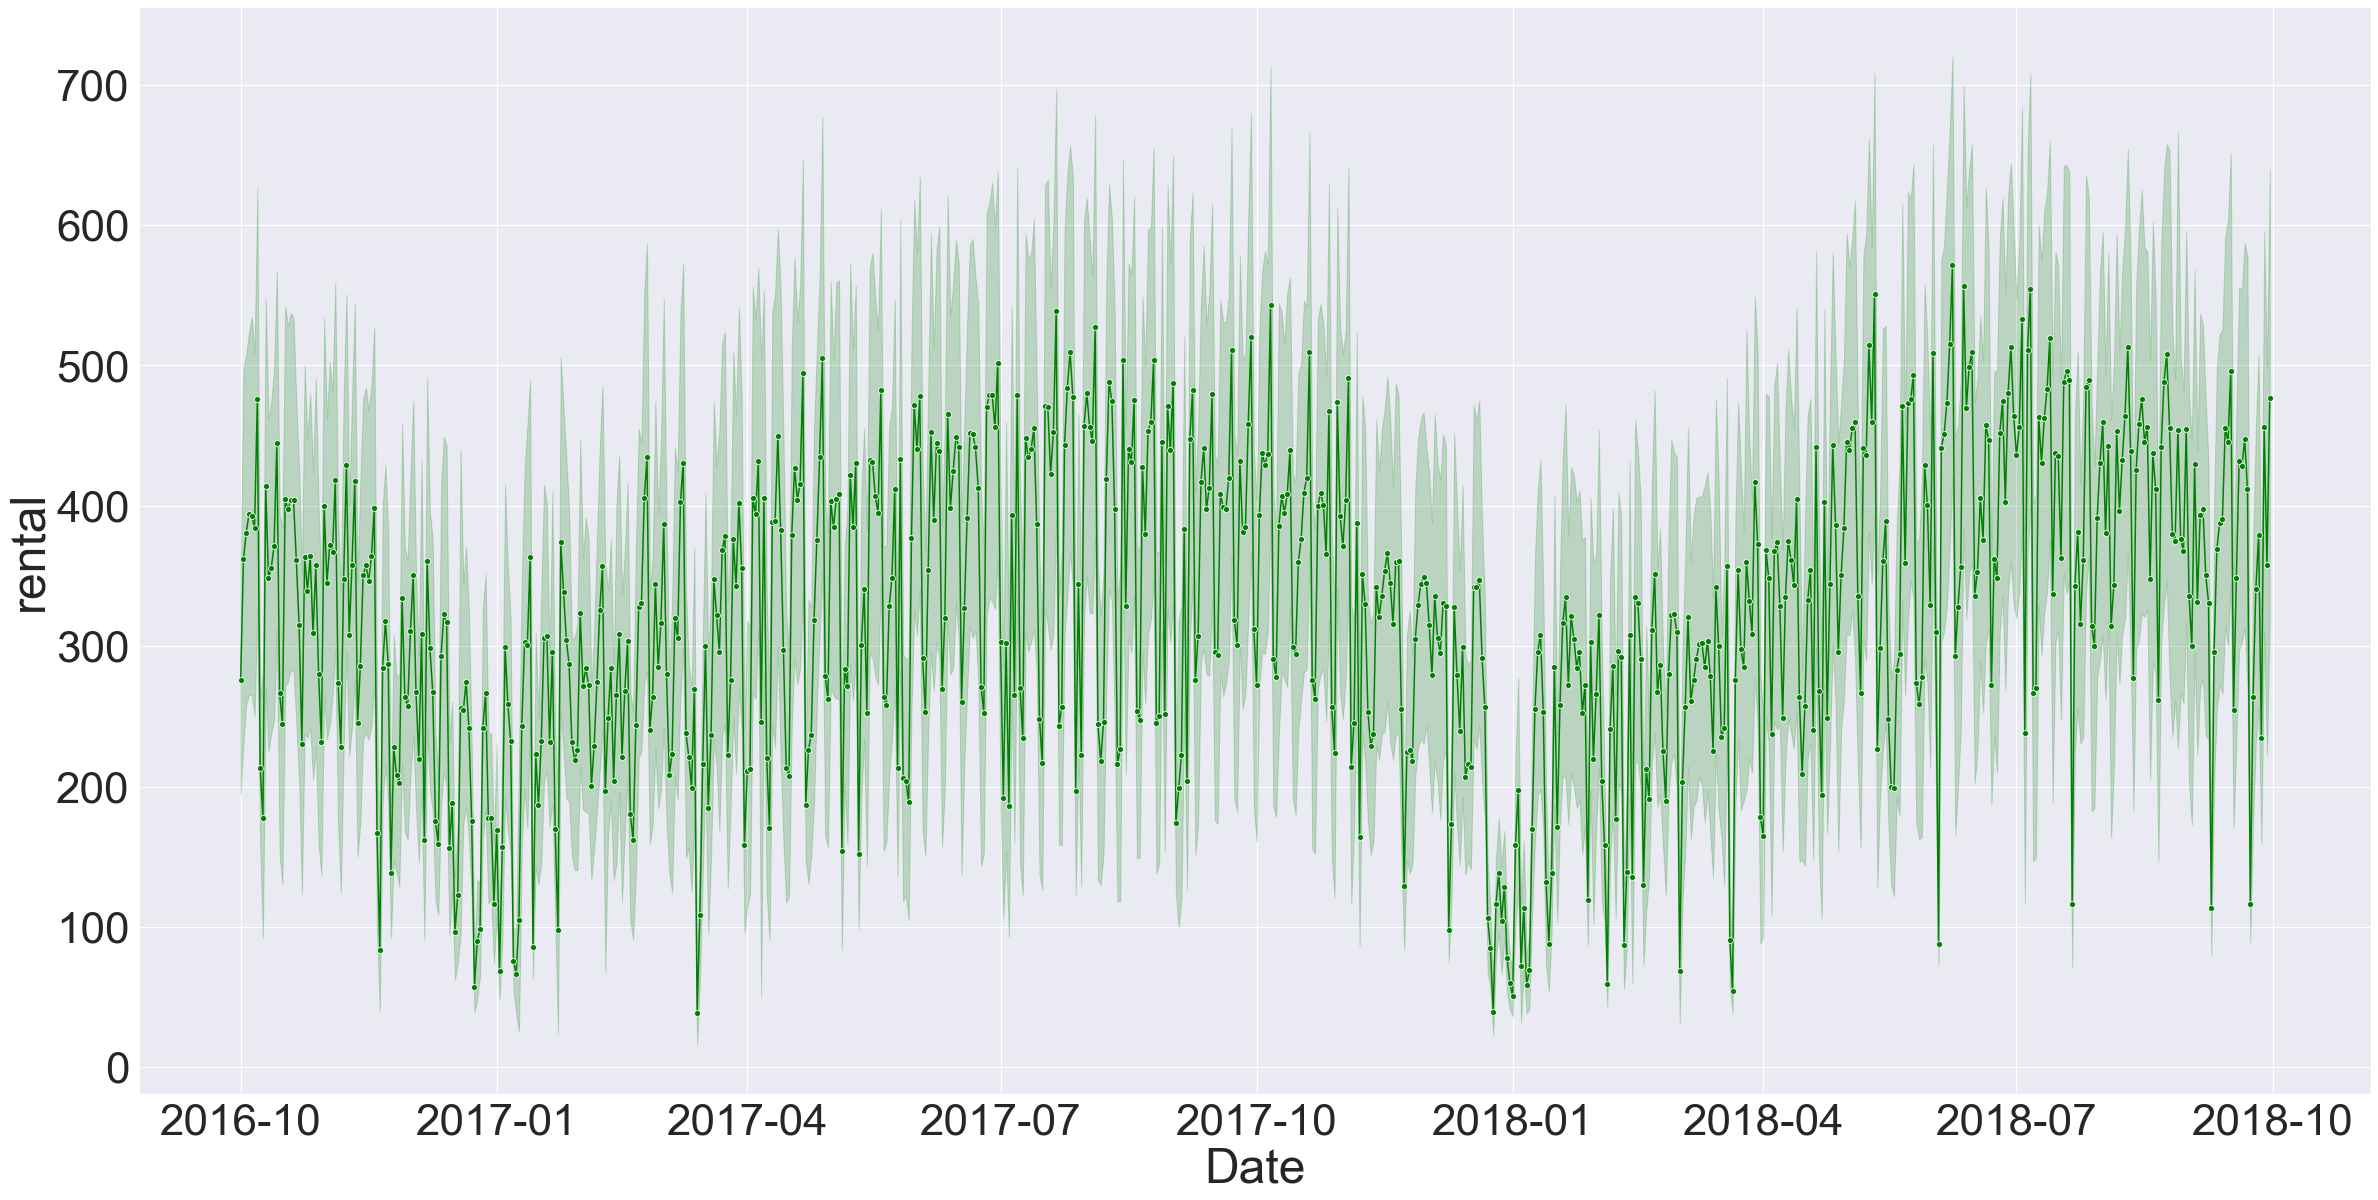

In [106]:
plt.figure(figsize=(40, 20))
sn.lineplot(data=data,x='Date',y='rental',marker='o',color='green')
sn.set(font_scale=4)
plt.show()

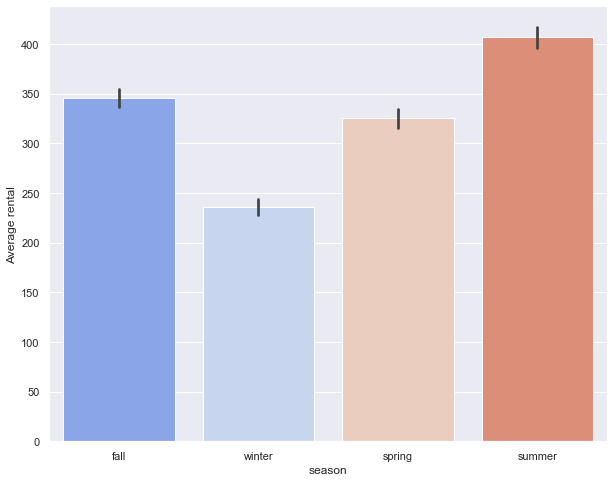

In [163]:
plt.figure(figsize=(10, 8))
sn.barplot(x = 'season', y = 'rental', data = data, estimator = np.average, palette='coolwarm')
plt.ylabel('Average rental')
sn.set(font_scale=1)
plt.show()

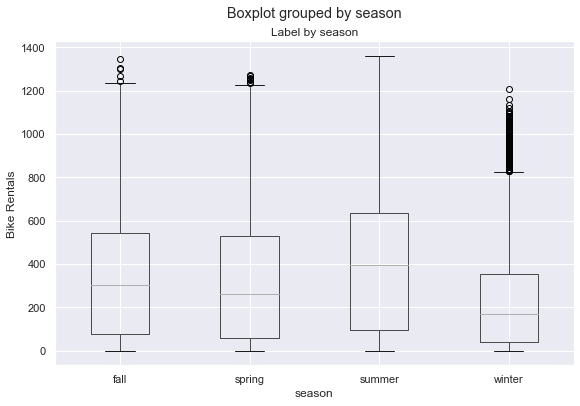

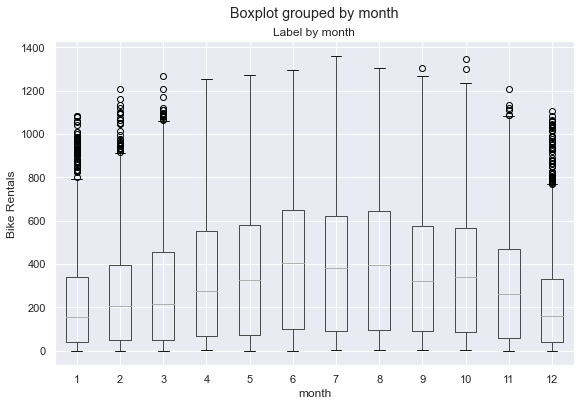

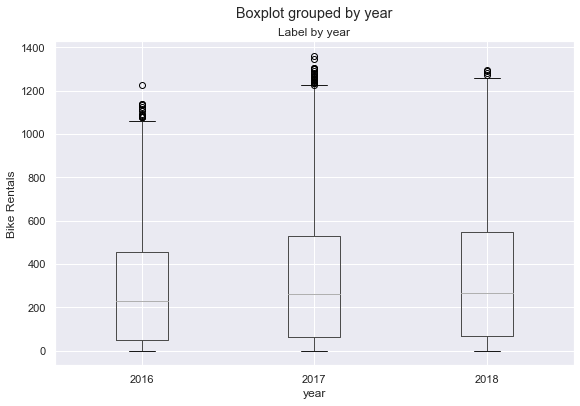

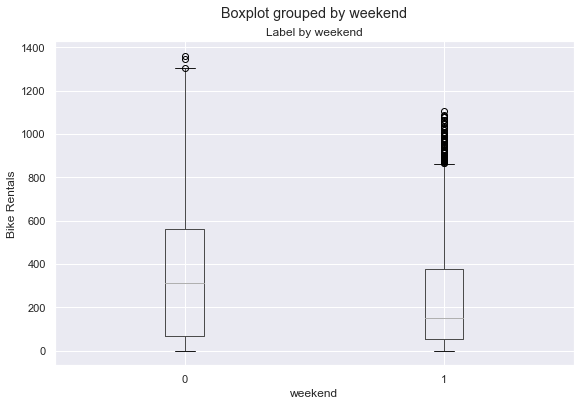

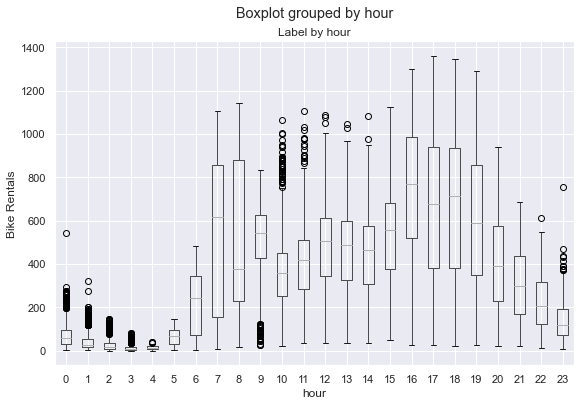

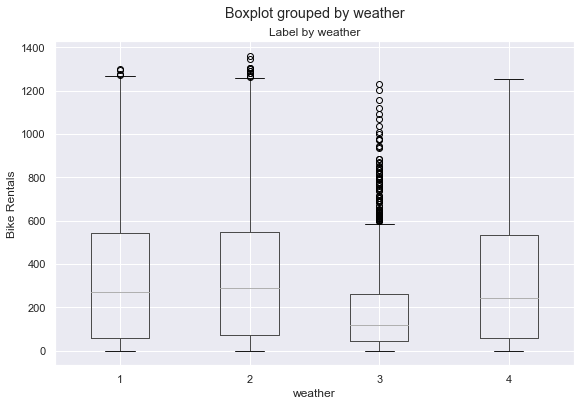

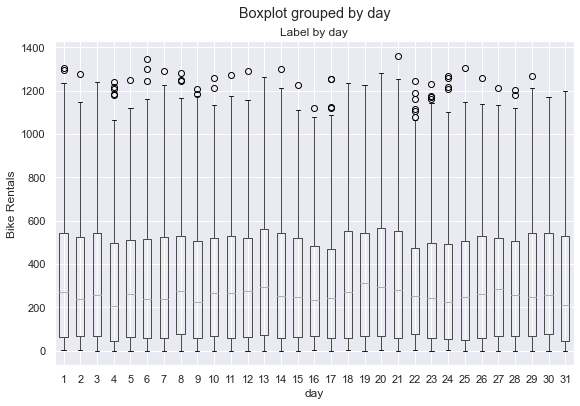

In [162]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'rental', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
sn.set(font_scale=1)
plt.show()


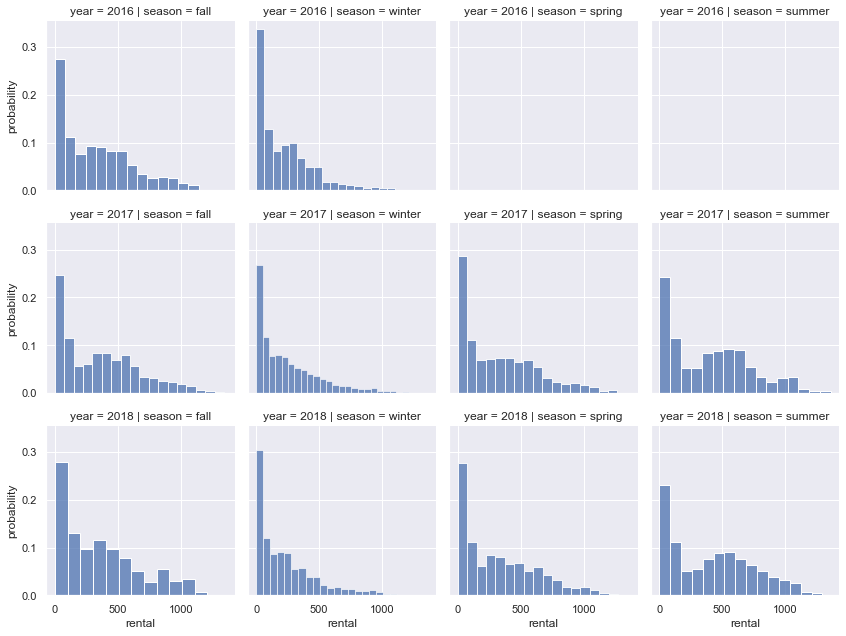

In [205]:
g = sn.FacetGrid(data,col='season',row='year')
g.map(sn.histplot,'rental',stat='probability')
g.set_ylabels('probability')
plt.show()

In [166]:
seasondf = data[['season','casual','member','rental']].groupby(['season'],as_index=False).sum()
seasondf['season']=['spring','summer','fall','winter']
seasondf

season    casual     member     rental
0  spring  273936.0  1037770.0  1311706.0
1  summer  285802.0   913655.0  1199457.0
2    fall  401602.0  1068924.0  1470526.0
3  winter  119139.0   824537.0   943676.0

In [167]:
def barplotGroups(data,x,y,hue,title,legendtitle=''):
    ax=sn.barplot(data=data,x=x,y=y,hue=hue)
    for i in ax.containers:
        ax.bar_label(i,)
    sn.despine(top = True, left = True)
    ax.set(yticklabels=[])
    ax.tick_params(left=False)
    ax.legend(title=legendtitle,loc='upper left')
    ax.set(title=title)
    return ax

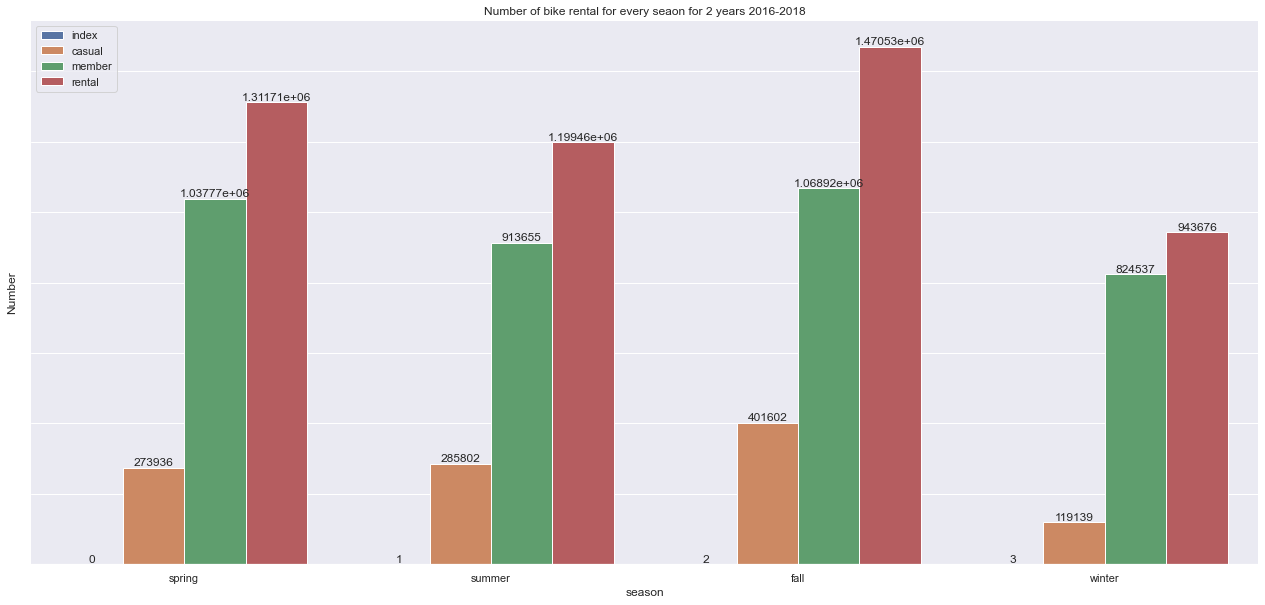

In [168]:
df=seasondf.reset_index().melt(id_vars='season',var_name='rental')
df.rename(columns={'value':'Number'},inplace=True)
title = 'Number of bike rental for every seaon for 2 years 2016-2018'
plt.figure(figsize=(22,10))
barplotGroups(data=df,x='season',y='Number',hue='rental',title=title);

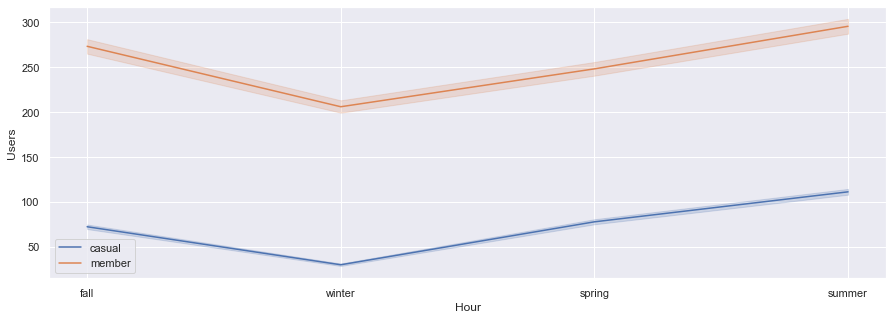

In [178]:
plt.figure(figsize = (15,5))
sn.lineplot(x = 'season', y = 'casual', data = data, estimator = np.average,palette="husl", label="casual")
sn.lineplot(x = 'season', y = 'member', data = data, estimator = np.average ,palette="husl", label="member")
plt.xlabel('Hour')
plt.ylabel('Users')
plt.show()


In [179]:
holidayModes=data.groupby(['season','weekend']).agg(CasualMean=('casual','mean'),CasualStd=('casual','std'),
                                                            RegisteredMean=('member','mean'),RegisteredStd=('member','std'),
                                                            TotalMean=('rental','mean'),TotalStd=('rental','std'))
holidayModes.index = holidayModes.index.set_levels([['Spring','Summer','Fall','Winter'],['Not weekend','weekend']])
holidayModes.reset_index(inplace=True)
holidayModes=holidayModes.round(0)
holidayModes

season      weekend  CasualMean  CasualStd  RegisteredMean  RegisteredStd  \
0  Spring  Not weekend        68.0       74.0           304.0          260.0   
1  Spring      weekend        83.0       92.0           189.0          171.0   
2  Summer  Not weekend        74.0       85.0           277.0          254.0   
3  Summer      weekend        88.0       94.0           162.0          140.0   
4    Fall  Not weekend       111.0       96.0           328.0          265.0   
5    Fall      weekend       110.0      106.0           188.0          168.0   
6  Winter  Not weekend        26.0       35.0           237.0          236.0   
7  Winter      weekend        40.0       62.0           130.0          129.0   

   TotalMean  TotalStd  
0      372.0     306.0  
1      272.0     257.0  
2      351.0     309.0  
3      251.0     228.0  
4      439.0     332.0  
5      298.0     269.0  
6      263.0     253.0  
7      170.0     183.0

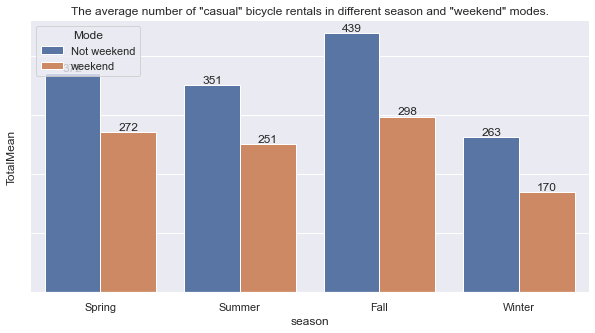

In [183]:
title = 'The average number of "casual" bicycle rentals in different season and "weekend" modes.'
plt.figure(figsize=(10,5))
barplotGroups(data=holidayModes,x='season',y='TotalMean',hue='weekend',title=title,legendtitle='Mode');

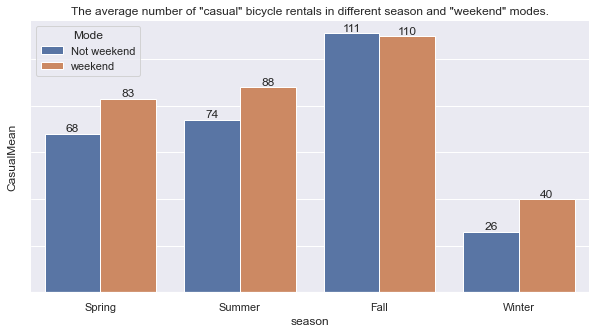

In [181]:
title = 'The average number of "casual" bicycle rentals in different season and "weekend" modes.'
plt.figure(figsize=(10,5))
barplotGroups(data=holidayModes,x='season',y='CasualMean',hue='weekend',title=title,legendtitle='Mode');

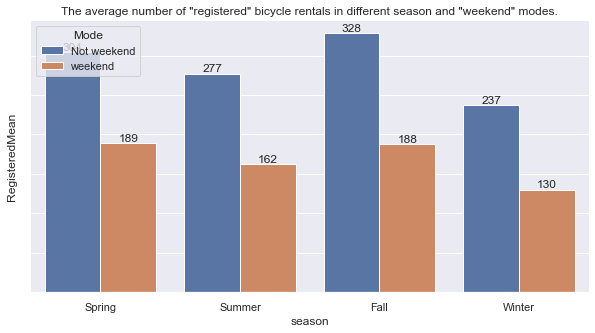

In [182]:
title = 'The average number of "registered" bicycle rentals in different season and "weekend" modes.'
plt.figure(figsize=(10,5))
barplotGroups(data=holidayModes,x='season',y='RegisteredMean',hue='weekend',title=title,legendtitle='Mode');

In [184]:
weatherModes=data.groupby('weather').agg(CasualMean=('casual','mean'),CasualStd=('casual','std'),CasualSum=('casual','sum'),
                                                            RegisteredMean=('member','mean'),RegisteredStd=('member','std'),RegisteredSum=('member','sum'),
                                                            TotalMean=('rental','mean'),TotalStd=('rental','std'),TotalSum=('rental','sum'),)
weatherModes=weatherModes.rename(index={1:'Fair',2:'Cloudy',3:'Light_S_R',4:'Heavy_S_R'} )
weatherModes.reset_index(inplace=True)
weatherModes=weatherModes.round(0)
weatherModes

weather  CasualMean  CasualStd  CasualSum  RegisteredMean  RegisteredStd  \
0       Fair        75.0       87.0   406450.0           259.0          244.0   
1     Cloudy        76.0       86.0   604398.0           269.0          242.0   
2  Light_S_R        30.0       47.0    43207.0           157.0          174.0   
3  Heavy_S_R        72.0       88.0    26424.0           257.0          251.0   

   RegisteredSum  TotalMean  TotalStd   TotalSum  
0      1401179.0      334.0     302.0  1807629.0  
1      2127648.0      345.0     298.0  2732046.0  
2       222428.0      187.0     203.0   265635.0  
3        93631.0      329.0     312.0   120055.0

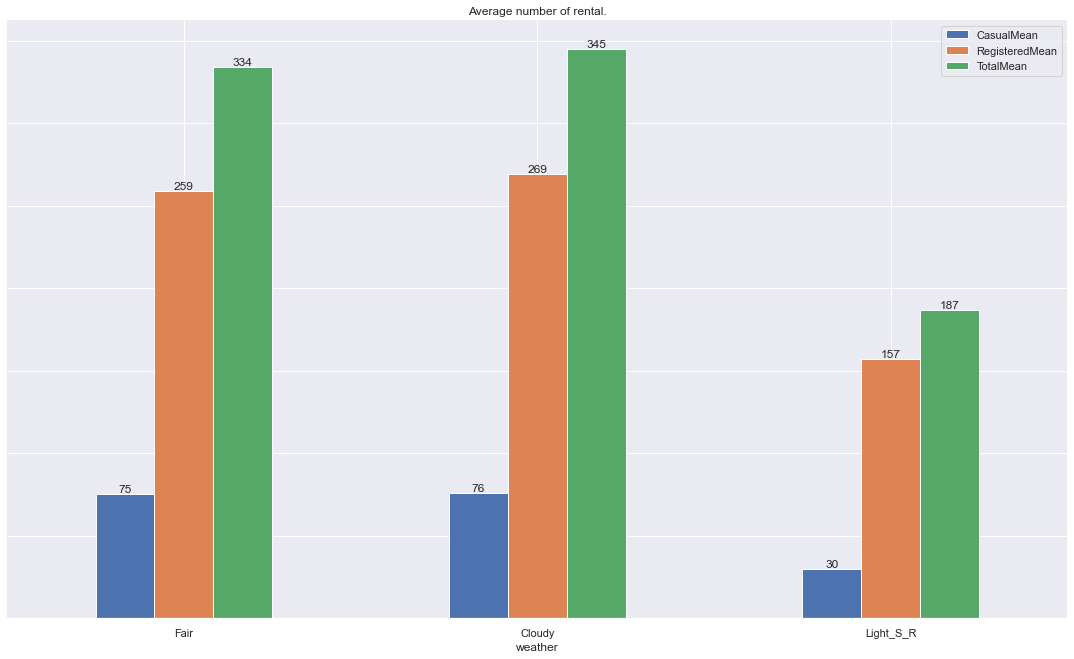

In [185]:

ax = weatherModes.iloc[:3,:].plot(x='weather',y=['CasualMean','RegisteredMean','TotalMean'],
                  kind='bar',figsize=(19,11),rot=0,title='Average number of rental.');
for i in ax.containers:
    ax.bar_label(i,)
sn.despine(top = True, left = True)
ax.set(yticklabels=[])
ax.tick_params(left=False)

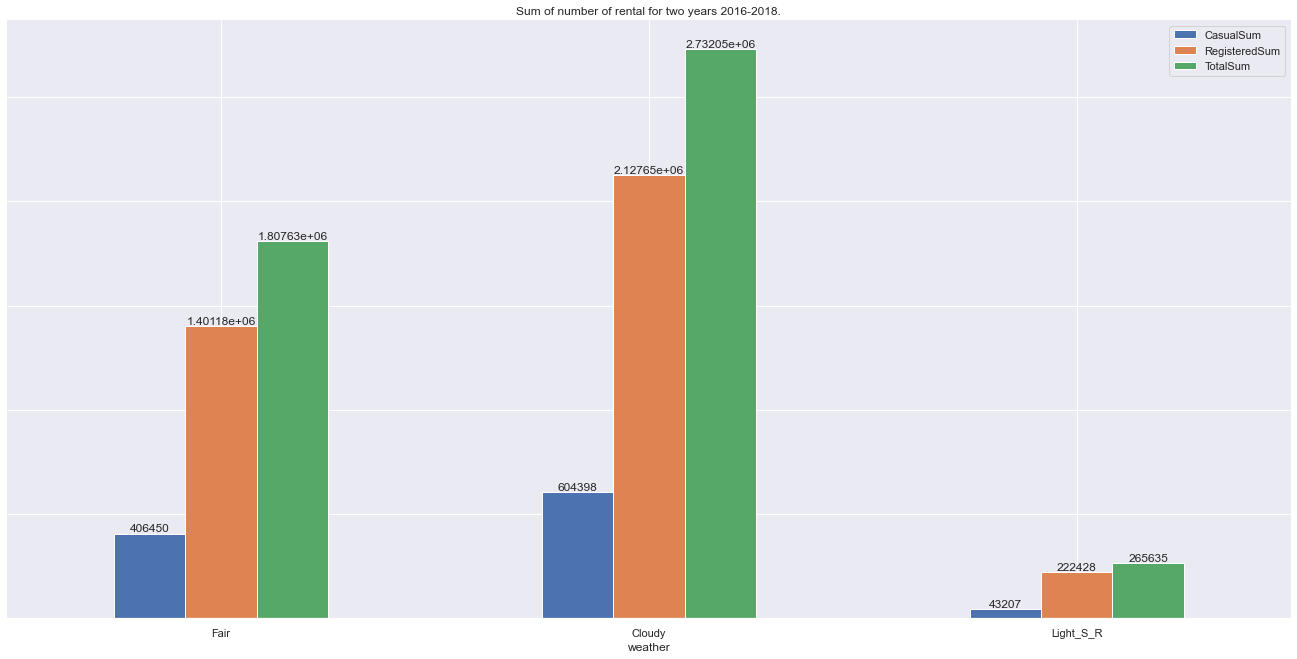

In [187]:
ax = weatherModes.iloc[:3,:].plot(x='weather',y=['CasualSum','RegisteredSum','TotalSum'],
                  kind='bar',figsize=(23,11),rot=0,title='Sum of number of rental for two years 2016-2018.');
for i in ax.containers:
    ax.bar_label(i,)
sn.despine(top = True, left = True)
ax.set(yticklabels=[])
ax.tick_params(left=False)

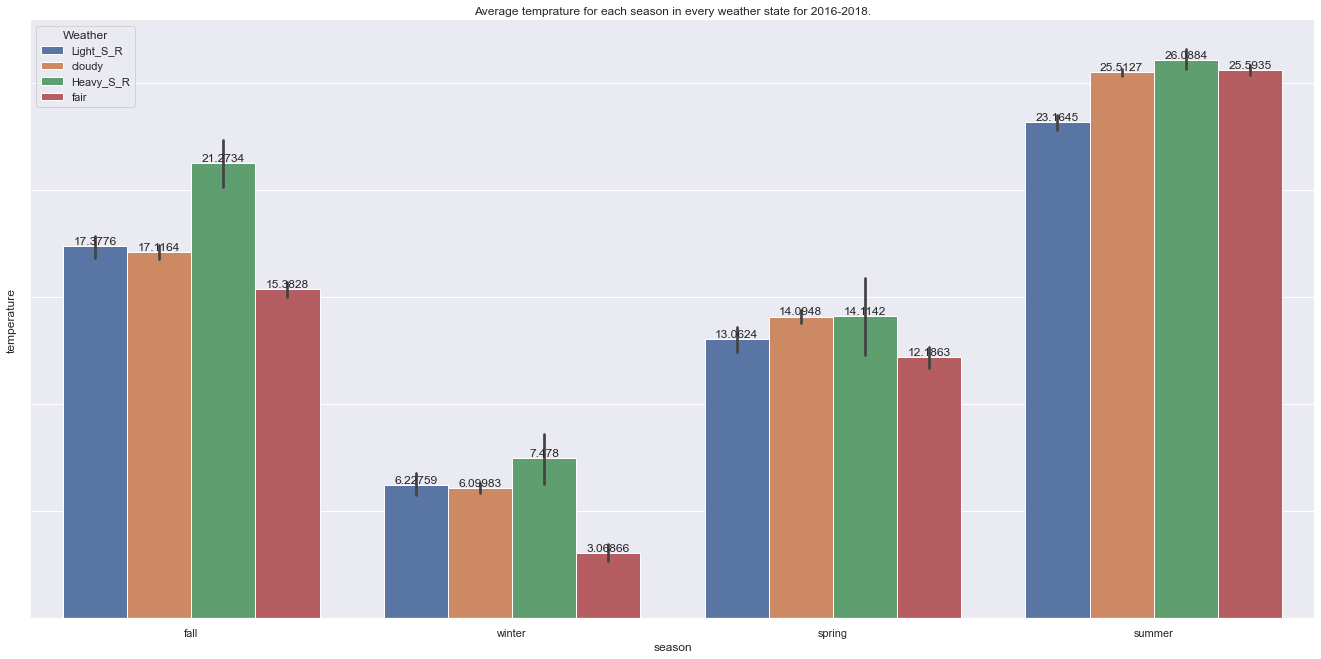

In [177]:
title = 'Average temprature for each season in every weather state for 2016-2018.'
plt.figure(figsize=(23,11))
barplotGroups(data=data,x='season',y='temperature',hue='weather_name',title=title,legendtitle='Weather');


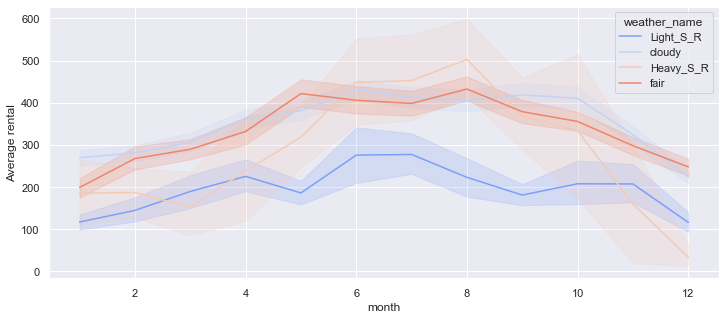

In [190]:
plt.figure(figsize = (12,5))
sn.lineplot(x = 'month', y = 'rental', data = data, estimator = np.average, hue = 'weather_name', palette = 'coolwarm')
plt.ylabel('Average rental')
plt.show()

<AxesSubplot:ylabel='weather_name'>

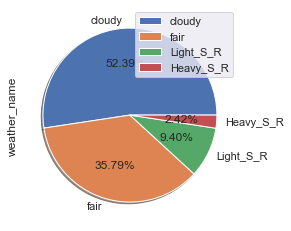

In [191]:
data.weather_name.value_counts().plot.pie(shadow=True,autopct='%.2f%%',legend=True)

<AxesSubplot:xlabel='weekend', ylabel='rental'>

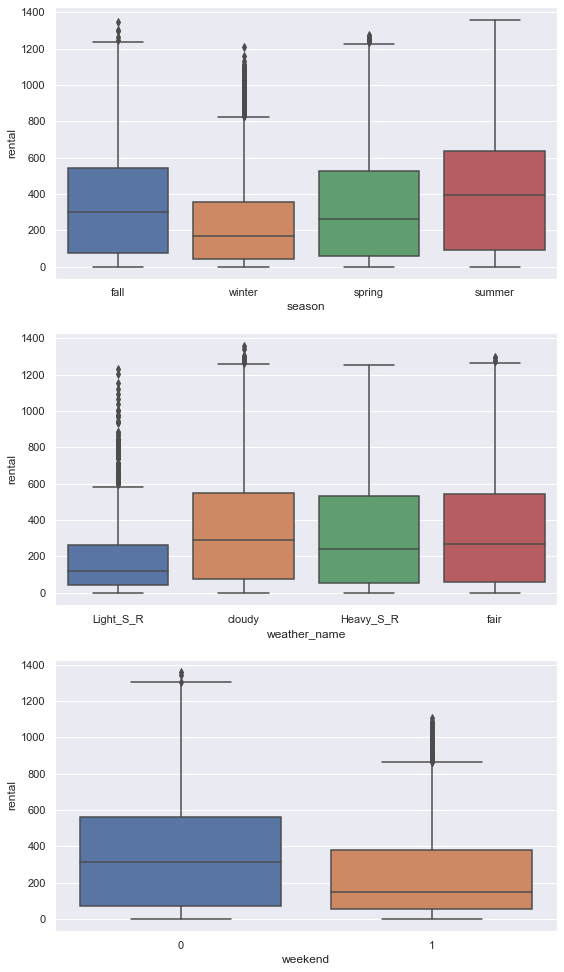

In [194]:
figure, axes = plt.subplots(3,1)
figure.set_size_inches(9, 17)
plt.subplot(3,1,1)
sn.boxplot(x='season',y='rental',data=data)
plt.subplot(3,1,2)
sn.boxplot(x='weather_name',y='rental',data=data)
plt.subplot(3,1,3)
sn.boxplot(x='weekend',y='rental',data=data)



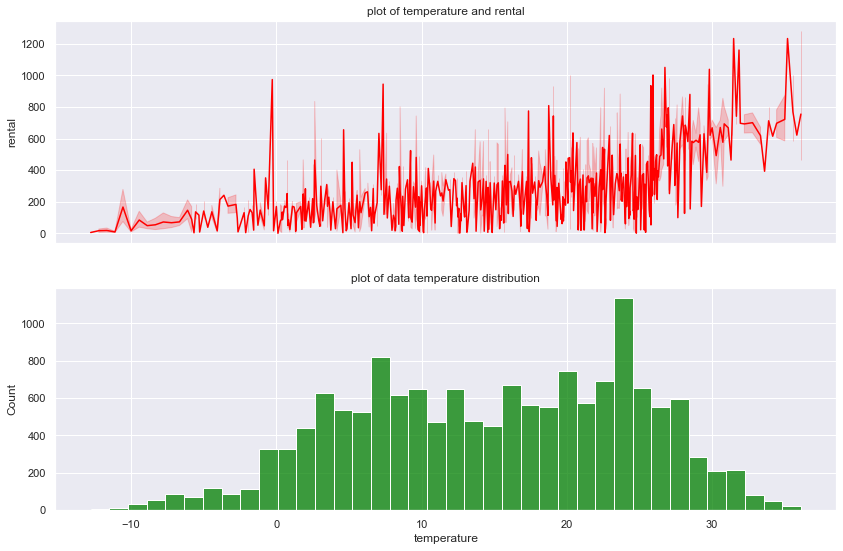

In [198]:
fig, (ax,ax2) = plt.subplots(2,1,sharex=True,figsize=(14,9))
sn.lineplot(data=data, x='temperature', y='rental',ax=ax,color='red')
sn.histplot(data['temperature'],ax=ax2,color='green')
ax.set_title('plot of temperature and rental')
ax2.set_title('plot of data temperature distribution')
plt.show()

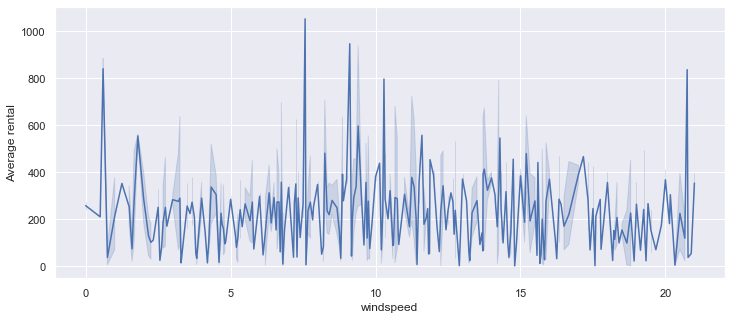

In [203]:
plt.figure(figsize = (12,5))
sn.lineplot(x = 'windspeed', y = 'rental', data = data, estimator = np.average, palette = 'coolwarm')
plt.ylabel('Average rental')
plt.show()

C:\Users\SINA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SINA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


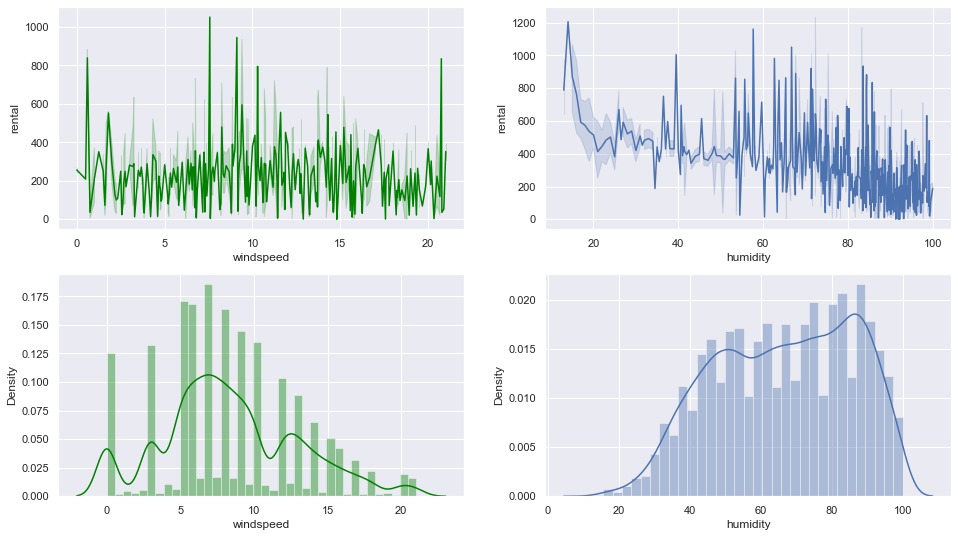

In [204]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sn.lineplot(x='windspeed',y='rental',data=data,color='green')
plt.subplot(2,2,2)
sn.lineplot(x='humidity',y='rental',data=data)
plt.subplot(2,2,3)
sn.distplot(data['windspeed'],color='green')
plt.subplot(2,2,4)
sn.distplot(data['humidity'])
plt.show()

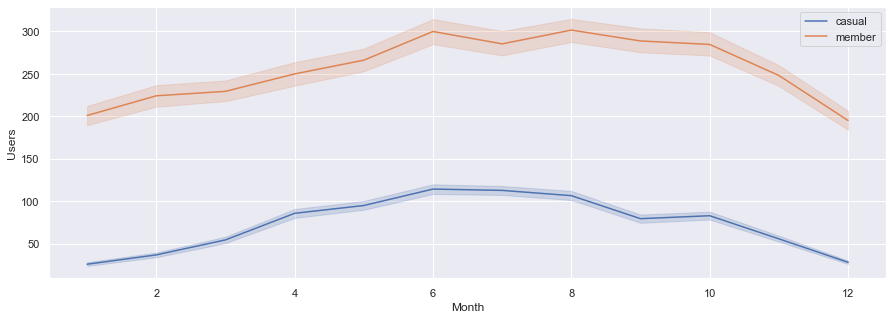

In [206]:
plt.figure(figsize = (15,5))
sn.lineplot(x = 'month', y = 'casual', data = data, estimator = np.average,palette="husl", label="casual")
sn.lineplot(x = 'month', y = 'member', data = data, estimator = np.average ,palette="husl", label="member")
plt.xlabel('Month')
plt.ylabel('Users')
plt.show()


Text(0.5, 1.0, 'rental vs month')

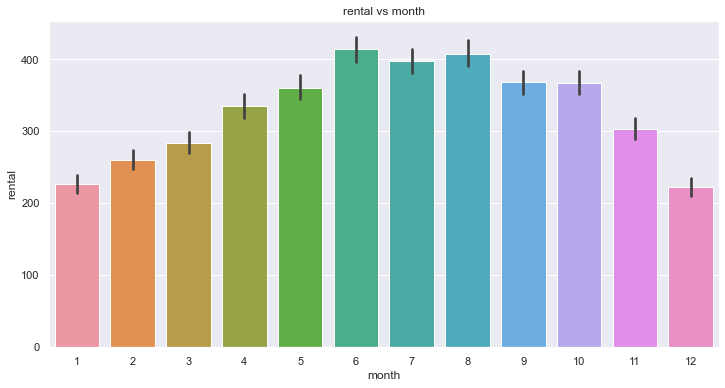

In [209]:
plt.figure(figsize=(12,6))
sn.barplot(x="month",y="rental",data=data)
plt.title('rental vs month')

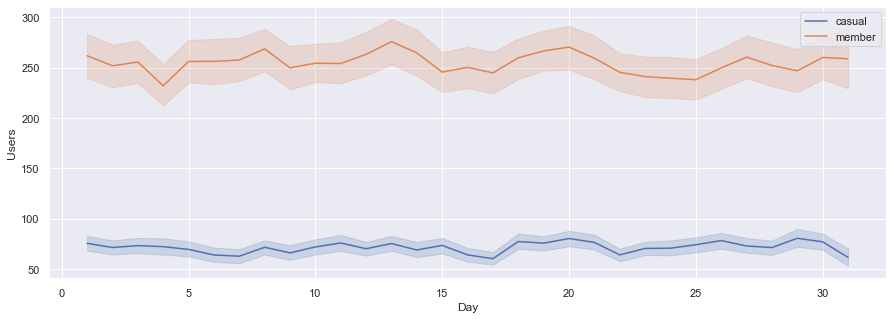

In [210]:
plt.figure(figsize = (15,5))
sn.lineplot(x = 'day', y = 'casual', data = data, estimator = np.average,palette="husl", label="casual")
sn.lineplot(x = 'day', y = 'member', data = data, estimator = np.average ,palette="husl", label="member")
plt.xlabel('Day')
plt.ylabel('Users')
plt.show()

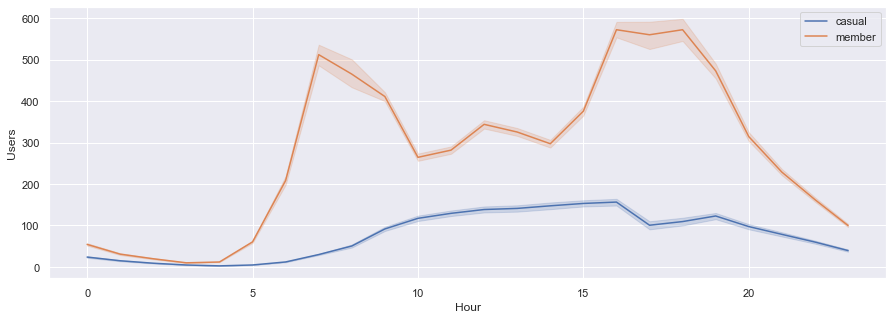

In [211]:
plt.figure(figsize = (15,5))
sn.lineplot(x = 'hour', y = 'casual', data = data, estimator = np.average,palette="husl", label="casual")
sn.lineplot(x = 'hour', y = 'member', data = data, estimator = np.average ,palette="husl", label="member")
plt.xlabel('Hour')
plt.ylabel('Users')
plt.show()

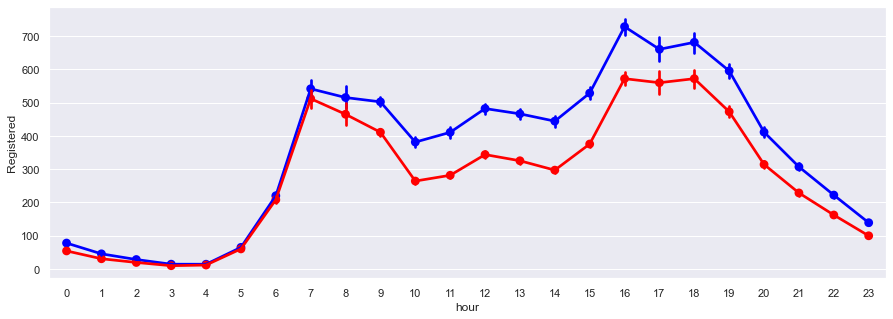

In [213]:
plt.figure(figsize = (15,5))
sn.pointplot(x = 'hour', y = 'rental', data = data, estimator = np.average, color = 'blue')
sn.pointplot(x = 'hour', y = 'member', data = data, estimator = np.average, color = 'red')
plt.ylabel('Registered')
plt.show()

Text(0, 0.5, 'Average rental')

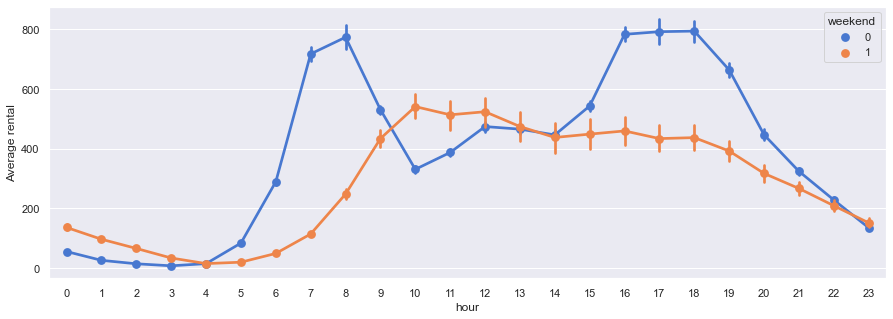

In [212]:
fig, axes = plt.subplots(ncols = 1, figsize = (15,5), sharey = True)
sn.pointplot(x = 'hour', y = 'rental', data = data, estimator = np.average, hue = 'weekend', palette = 'muted')
plt.ylabel('Average rental')

Text(0.5, 1.0, 'hours vs rental')

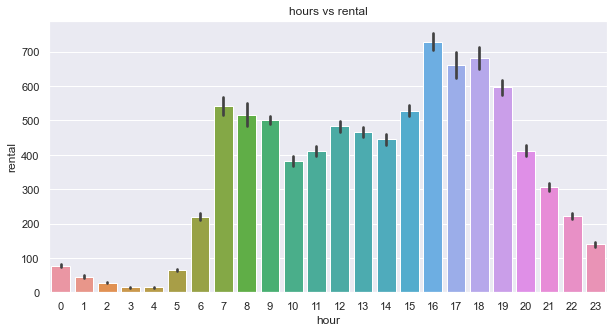

In [214]:
plt.figure(figsize=(10,5))
sn.barplot(x='hour',y='rental',data=data)
plt.title('hours vs rental')

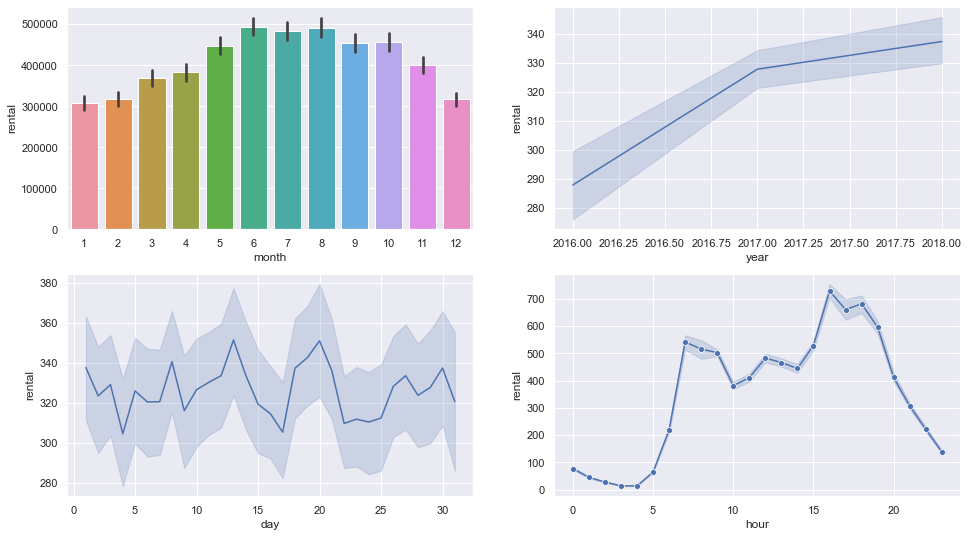

In [216]:
plt.figure(figsize=(16,9))
sn.set_theme()
plt.subplot(2,2,1)
sn.barplot(data=data,x='month',y='rental',estimator=np.sum)
plt.subplot(2,2,2)
sn.lineplot(data=data,x='year',y='rental')
plt.subplot(2,2,3)
sn.lineplot(data=data,x='day',y='rental',estimator=np.mean)
plt.subplot(2,2,4)
sn.lineplot(data=data,x='hour',y='rental',marker='o')
plt.show()

In [217]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [220]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['season','month', 'hour', 'weekend', 'day', 'weather','temperature','member','humidity']
FunctionAnova(inpData=data, 
              TargetVariable='rental', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

season is correlated with rental | P-Value: 6.699674833250909e-146
month is correlated with rental | P-Value: 4.316433094892259e-160
hour is correlated with rental | P-Value: 0.0
weekend is correlated with rental | P-Value: 1.374215695306229e-97
day is NOT correlated with rental | P-Value: 0.6704230335074108
weather is correlated with rental | P-Value: 9.51143869330728e-77
temperature is correlated with rental | P-Value: 0.0
member is correlated with rental | P-Value: 0.0
humidity is correlated with rental | P-Value: 2.7835408471907778e-152


['season',
 'month',
 'hour',
 'weekend',
 'weather',
 'temperature',
 'member',
 'humidity']

In [223]:
FinalPredictor=['season','month','hour','member','weekend','temperature','rental','humidity']

Final_Data=data[FinalPredictor]
Final_Data.head()
cat_attributes=['month','hour','weekend','season']

In [224]:
encoded_attributes=pd.get_dummies(Final_Data,columns=cat_attributes)
print('Shape of transfomed dataframe:',encoded_attributes.shape)
encoded_attributes.head(5)

Shape of transfomed dataframe: (15099, 46)


member  temperature  rental  humidity  month_1  month_2  month_3  month_4  \
0    80.0        18.33   103.0     100.0        0        0        0        0   
1    53.0        17.78    63.0     100.0        0        0        0        0   
2    27.0        17.78    33.0     100.0        0        0        0        0   
3    20.0        17.78    23.0     100.0        0        0        0        0   
4    11.0        17.78    11.0     100.0        0        0        0        0   

   month_5  month_6  ...  hour_20  hour_21  hour_22  hour_23  weekend_0  \
0        0        0  ...        0        0        0        0          0   
1        0        0  ...        0        0        0        0          0   
2        0        0  ...        0        0        0        0          0   
3        0        0  ...        0        0        0        0          0   
4        0        0  ...        0        0        0        0          0   

   weekend_1  season_fall  season_spring  season_summer  season_winter  
0          1            1              0              0              0  
1          1            1              0              0              0  
2          1            1              0              0              0  
3          1            1              0              0              0  
4          1            1              0              0              0  

[5 rows x 46 columns]

In [226]:
X = encoded_attributes.iloc[:, (encoded_attributes.columns!='rental')].values
Y = encoded_attributes.rental
print(np.shape(X))

(15099, 45)


In [227]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state =428)
X_train.shape

(10569, 45)

In [228]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [230]:
coe=model.coef_
coe

array([ 1.13336999e+00,  3.35727892e+00, -6.32494985e-01, -1.50618186e+11,
       -1.50618186e+11,  1.14256508e+11,  1.14256508e+11,  1.14256508e+11,
       -8.92860830e+10, -8.92860830e+10, -8.92860830e+10, -1.78170712e+11,
       -1.78170712e+11, -1.78170712e+11, -1.50618186e+11, -1.37243555e+10,
       -1.37243555e+10, -1.37243555e+10, -1.37243555e+10, -1.37243555e+10,
       -1.37243555e+10, -1.37243555e+10, -1.37243555e+10, -1.37243555e+10,
       -1.37243555e+10, -1.37243554e+10, -1.37243554e+10, -1.37243554e+10,
       -1.37243554e+10, -1.37243554e+10, -1.37243554e+10, -1.37243554e+10,
       -1.37243555e+10, -1.37243555e+10, -1.37243554e+10, -1.37243554e+10,
       -1.37243554e+10, -1.37243555e+10, -1.37243555e+10,  6.39853095e+10,
        6.39853095e+10,  2.84081661e+11, -8.34555859e+09,  1.95197032e+11,
        2.56529135e+11])

In [231]:
inter=model.intercept_
inter

-156171903251.3415

In [249]:
Y_pred=model.predict(X_test)
Y_pred

array([129.20758057, 971.79165649, 418.67871094, ..., 252.37716675,
        46.32104492, 244.8755188 ])

In [250]:
Bike_df1=Y_test.to_frame()
Bike_df1=Bike_df1.reset_index()
Bike_df1
Bike_df11=Bike_df1['rental'].to_frame()
Bike_df2=pd.DataFrame(Y_pred,columns=['Y_pred'])
Bike_predictions=pd.merge(Bike_df11,Bike_df2,left_index=True,right_index=True)
Bike_predictions.to_csv(R'C:\Users\SINA\Downloads\Telegram Desktop\7B21E008.csv')
Bike_predictions

rental      Y_pred
0       98.0  129.207581
1      925.0  971.791656
2      422.0  418.678711
3      695.0  550.512909
4        9.0  -17.204956
...      ...         ...
4525   462.0  462.529236
4526   106.0  113.310120
4527   226.0  252.377167
4528    28.0   46.321045
4529   177.0  244.875519

[4530 rows x 2 columns]

In [248]:

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict
test_predict

array([129.20758057, 971.79165649, 418.67871094, ..., 252.37716675,
        46.32104492, 244.8755188 ])

In [245]:
MAE_train = mean_absolute_error(Y_train,train_predict)
MAE_test = mean_absolute_error(Y_test,test_predict)

MSE_train = mean_squared_error(Y_train,train_predict)
MSE_test = mean_squared_error(Y_test,test_predict)

RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

Mape_train = np.mean(np.abs((Y_train,train_predict)))
Mape_test = np.mean(np.abs((Y_test,test_predict)))

R2_train = r2_score(Y_train, train_predict)

R2_test = r2_score(Y_test, test_predict)

print("MAE of Trained data : ",MAE_train)
print("MAE of Test data    : ", MAE_test)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

print("MSE of Trained Data", MSE_train)
print("MSE of Test Data", MSE_test)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

print("RMSE of Trained Data", RMSE_train)
print("RMSE of Test Data", RMSE_test)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Mape of train :, ",Mape_train)
print("Mape of test :, ",Mape_test)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print("R2 of train: ", R2_train)
print("R2 of test: ", R2_test)

MAE of Trained data :  35.29552438999262
MAE of Test data    :  35.31805578236022
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSE of Trained Data 2118.4609163457308
MSE of Test Data 2150.31817259345
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
RMSE of Trained Data 46.026741317909206
RMSE of Test Data 46.37152329386485
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Mape of train :,  329.5832773916588
Mape of test :,  325.77838892989337
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
R2 of train:  0.9757688592777766
R2 of test:  0.9753107301029814


In [237]:
lr=model.score(X_test,Y_test)
print('Accuracy of the model :',lr)
print('Model coefficients :',model.coef_)
print('Model intercept value :',model.intercept_)

Accuracy of the model : 0.9753107301029814
Model coefficients : [ 1.13336999e+00  3.35727892e+00 -6.32494985e-01 -1.50618186e+11
 -1.50618186e+11  1.14256508e+11  1.14256508e+11  1.14256508e+11
 -8.92860830e+10 -8.92860830e+10 -8.92860830e+10 -1.78170712e+11
 -1.78170712e+11 -1.78170712e+11 -1.50618186e+11 -1.37243555e+10
 -1.37243555e+10 -1.37243555e+10 -1.37243555e+10 -1.37243555e+10
 -1.37243555e+10 -1.37243555e+10 -1.37243555e+10 -1.37243555e+10
 -1.37243555e+10 -1.37243554e+10 -1.37243554e+10 -1.37243554e+10
 -1.37243554e+10 -1.37243554e+10 -1.37243554e+10 -1.37243554e+10
 -1.37243555e+10 -1.37243555e+10 -1.37243554e+10 -1.37243554e+10
 -1.37243554e+10 -1.37243555e+10 -1.37243555e+10  6.39853095e+10
  6.39853095e+10  2.84081661e+11 -8.34555859e+09  1.95197032e+11
  2.56529135e+11]
Model intercept value : -156171903251.3415


In [238]:
predict=cross_val_predict(model,X_train,Y_train,cv=3)
predict

array([165.50540161, 310.25579834, 113.08032227, ..., -54.55592346,
       202.37876892,  77.5801239 ])

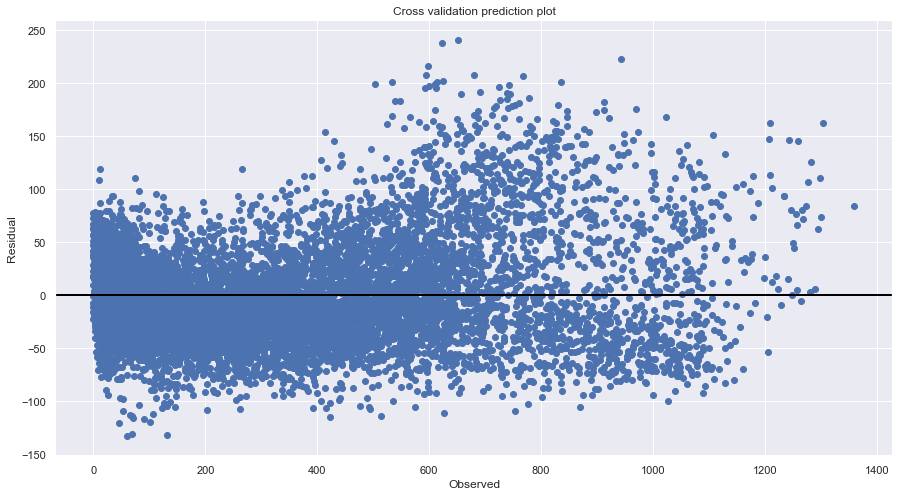

In [239]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(Y_train,Y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [240]:
r2_scores = cross_val_score(model, X_train, Y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.9755242707442672
